In [1]:
## Goal: Explore data w/ visualizations for Adventure Works dataset
      #    for purpose of Classification Supervised ML w/ label= AveMonthSpend

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_R = pd.read_csv('AdvWorksCusts_Preped.csv', header=0)
print(AW_Custs_R.shape)
AW_Custs_R.head(5)

(16404, 21)


FirstName LastName         AddressLine1         City StateProvinceName  \
0        Jon     Yang      3761 N. 14th St  Rockhampton        Queensland   
1     Eugene    Huang           2243 W St.      Seaford          Victoria   
2      Ruben   Torres     5844 Linden Land       Hobart          Tasmania   
3    Christy      Zhu     1825 Village Pl.   North Ryde   New South Wales   
4  Elizabeth  Johnson  7553 Harness Circle   Wollongong   New South Wales   

  CountryRegionName PostalCode          PhoneNumber  BirthDate   Education  \
0         Australia       4700  1 (11) 500 555-0162   4/8/1966  Bachelors    
1         Australia       3198  1 (11) 500 555-0110  5/14/1965  Bachelors    
2         Australia       7001  1 (11) 500 555-0184  8/12/1965  Bachelors    
3         Australia       2113  1 (11) 500 555-0162  2/15/1968  Bachelors    
4         Australia       2500  1 (11) 500 555-0131   8/8/1968  Bachelors    

     ...     Gender MaritalStatus HomeOwnerFlag  NumberCarsOwned  \
0    ...          M             M             1                0   
1    ...          M             S             0                1   
2    ...          M             M             1                1   
3    ...          F             S             0                1   
4    ...          F             S             1                4   

   NumberChildrenAtHome  TotalChildren  YearlyIncome  Age  AveMonthSpend  \
0                     0              2        137947   31             89   
1                     3              3        101141   32            117   
2                     3              3         91945   32            123   
3                     0              0         86688   29             50   
4                     5              5         92771   29             95   

   BikeBuyer  
0          0  
1          1  
2          0  
3          0  
4          1  

[5 rows x 21 columns]

In [3]:
def age_group_xform(x):
    if x > 55: return 'Over 55'
    elif 45 < x <= 55: return '45-55'
    elif 25 <= x <= 45: return '25-45'
    elif 0 < x < 25: return 'Under 25'
    else: return 'None'

AW_Custs_R["AgeGroup"] = AW_Custs_R['Age'].map(age_group_xform)
print(AW_Custs_R["AgeGroup"])

0           25-45
1           25-45
2           25-45
3           25-45
4           25-45
5           25-45
6           25-45
7           25-45
8           25-45
9           25-45
10          25-45
11          25-45
12          25-45
13          25-45
14          25-45
15       Under 25
16       Under 25
17       Under 25
18       Under 25
19       Under 25
20       Under 25
21          45-55
22          45-55
23          45-55
24          45-55
25          45-55
26          45-55
27          45-55
28          45-55
29          45-55
           ...   
16374    Under 25
16375    Under 25
16376       45-55
16377       25-45
16378       25-45
16379       25-45
16380       25-45
16381       25-45
16382       25-45
16383       25-45
16384       25-45
16385       25-45
16386       25-45
16387       25-45
16388       25-45
16389       25-45
16390       25-45
16391       25-45
16392       25-45
16393       25-45
16394       25-45
16395       25-45
16396       25-45
16397       45-55
16398     

In [4]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(AW_Custs_R, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(AW_Custs_R[col].value_counts())
        
cat_cols = ['FirstName', 'LastName', 'AddressLine1',  'City',
            'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 
             'BirthDate','Education', 'Occupation', 'Gender', 'MaritalStatus', 'Age', 'AgeGroup']
count_unique(AW_Custs_R, cat_cols)


For column FirstName
Jennifer      87
Richard       86
Isabella      85
Dalton        85
Katherine     85
Eduardo       85
Lucas         85
Marcus        84
Morgan        84
Alexandra     82
Sydney        81
Kaitlyn       79
Natalie       79
Chloe         78
Julia         77
Xavier        77
Ian           76
Seth          76
James         72
Devin         72
Thomas        71
Jessica       68
Jose          68
Miguel        67
Abigail       67
Jordan        66
Rachel        66
Jonathan      65
Wyatt         65
Samuel        65
              ..
Niñia          1
Lorrin         1
Dave           1
Madalena       1
Pearlie        1
Mandar         1
Marcel         1
Peggy          1
Punya          1
Sylvia         1
Giorgio        1
Alma           1
Jim            1
Justine        1
Cathy          1
César          1
Lane           1
Ioannis        1
Britta         1
Masato         1
Lolan          1
Rodrigo        1
Juha-Pekka     1
Liz            1
Rolando        1
Masaki         1
Rakesh   

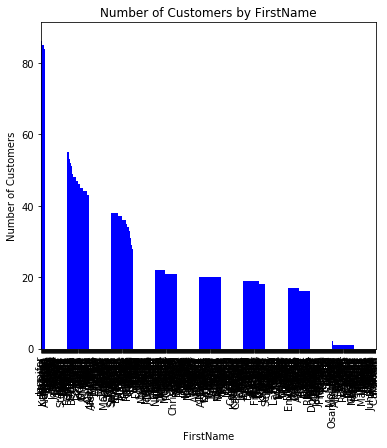

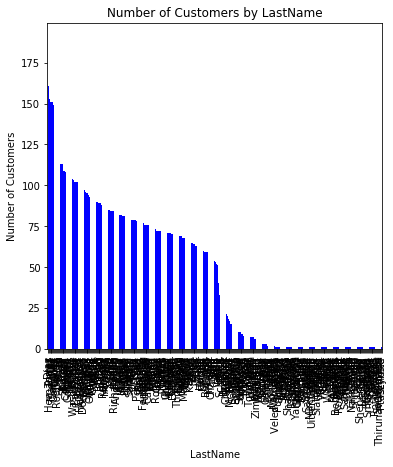

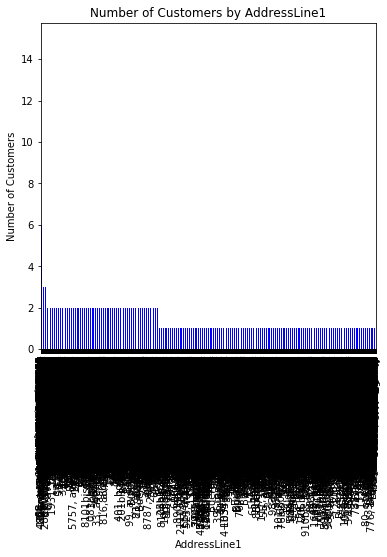

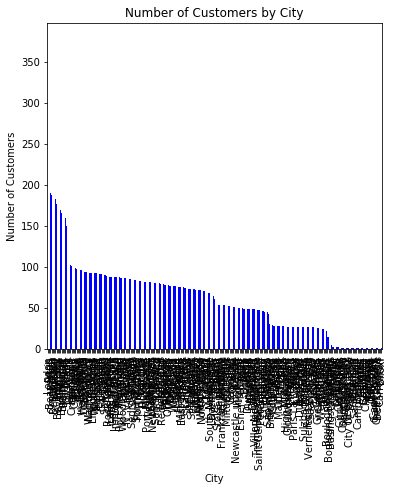

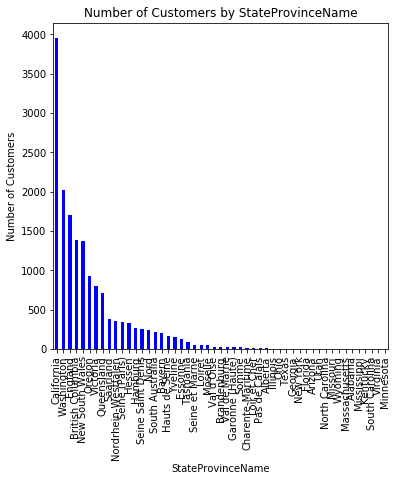

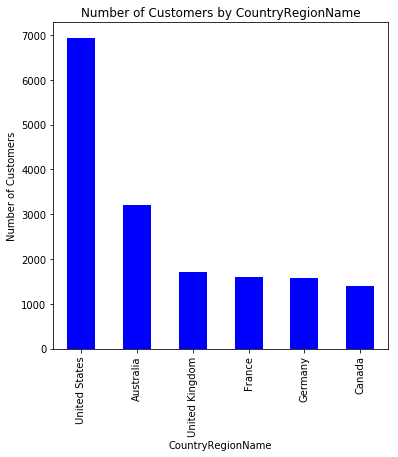

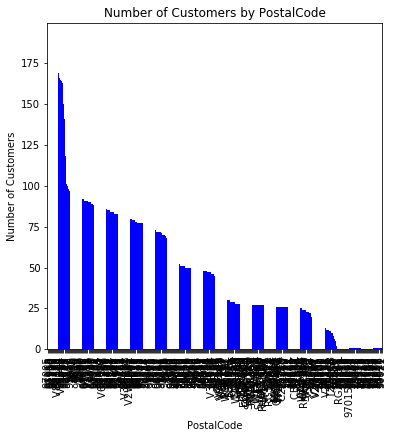

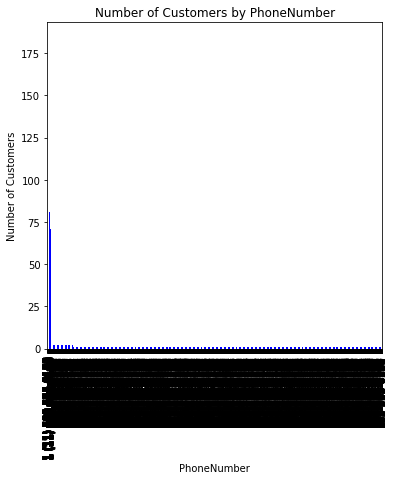

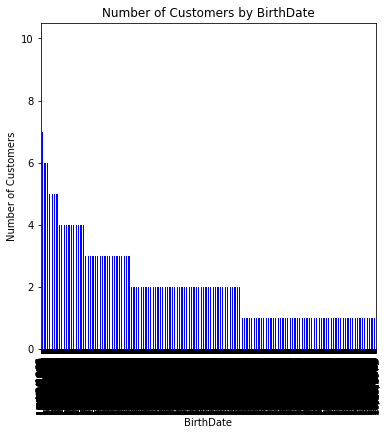

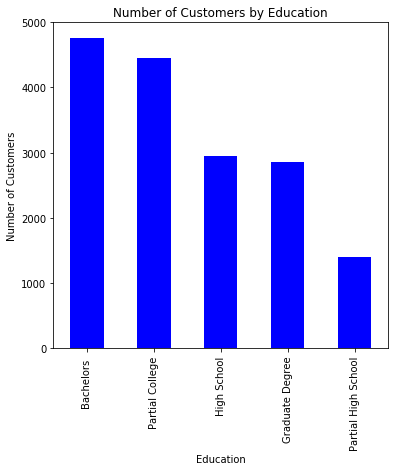

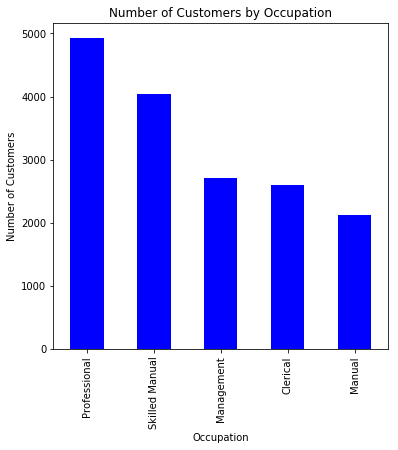

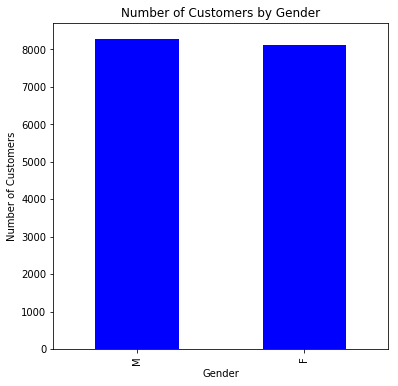

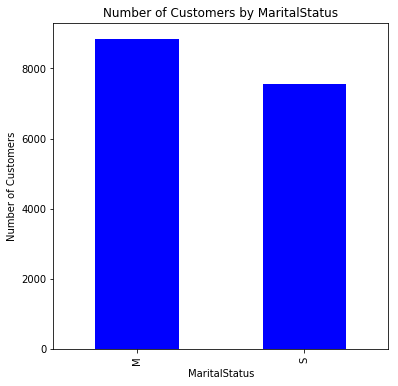

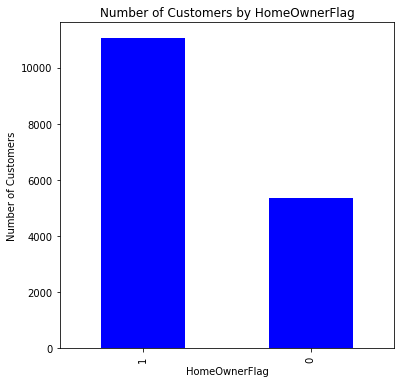

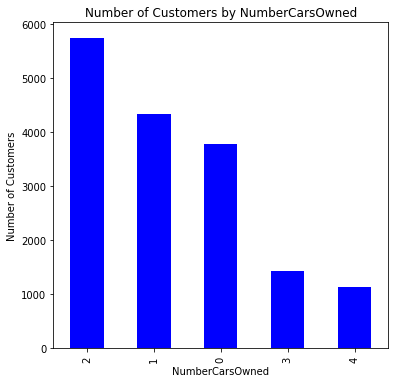

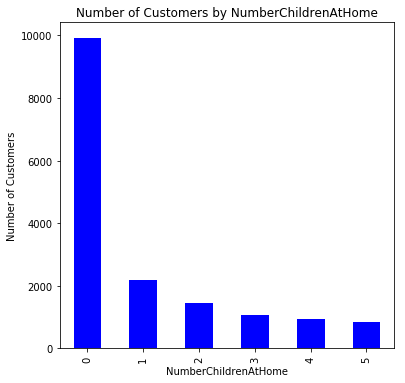

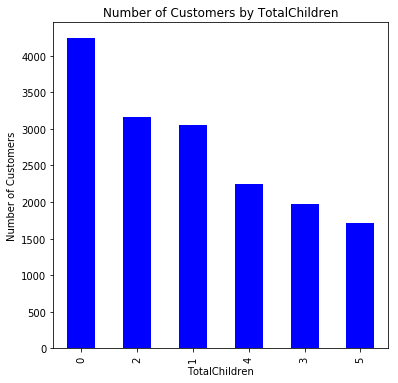

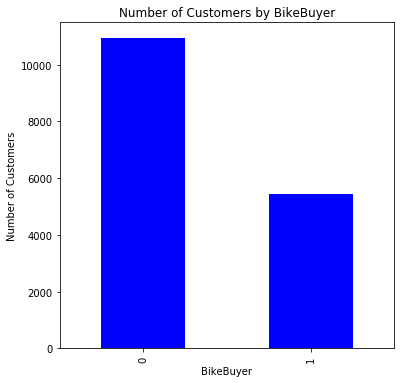

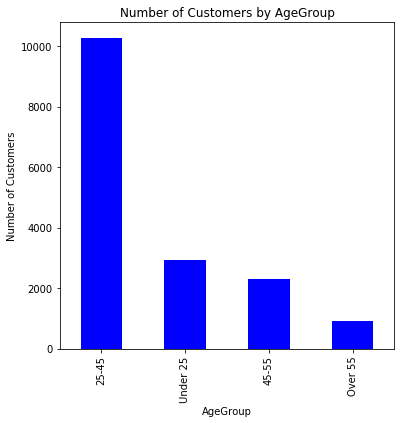

In [5]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(AW_Custs_R, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = AW_Custs_R[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Number of Customers by ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_cols = ['FirstName', 'LastName', 'AddressLine1',  'City',
            'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 
             'BirthDate','Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
              'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer', 'AgeGroup']
plot_bars(AW_Custs_R, plot_cols)      

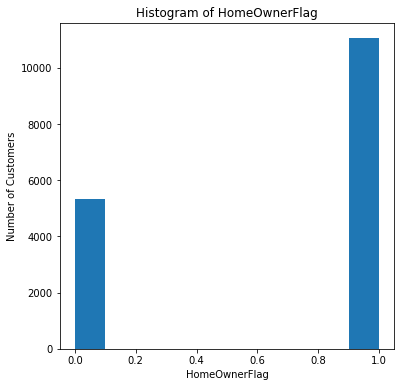

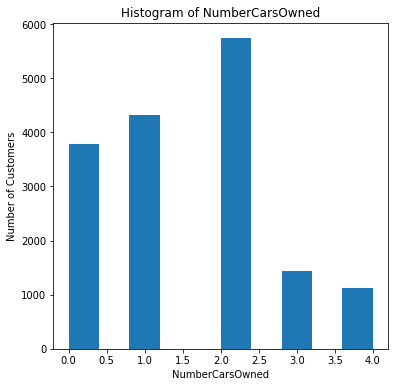

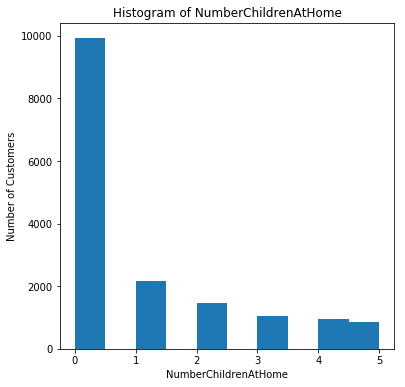

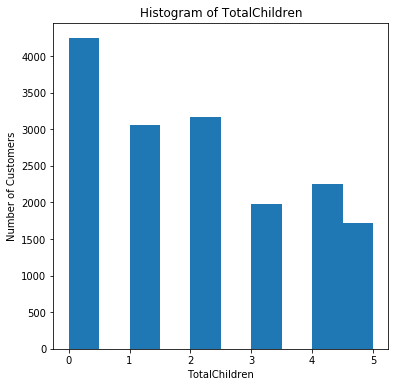

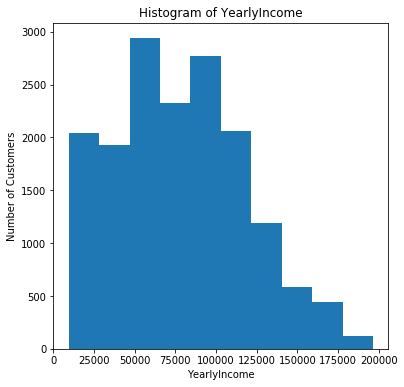

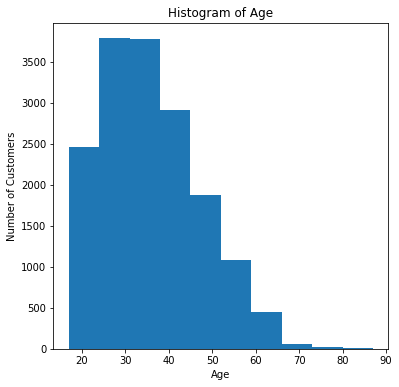

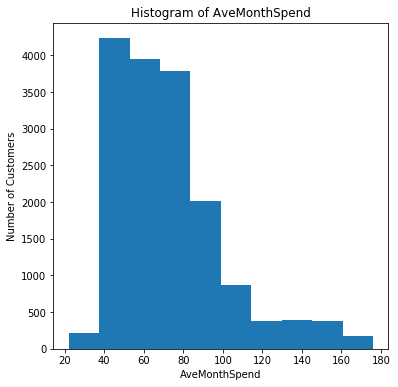

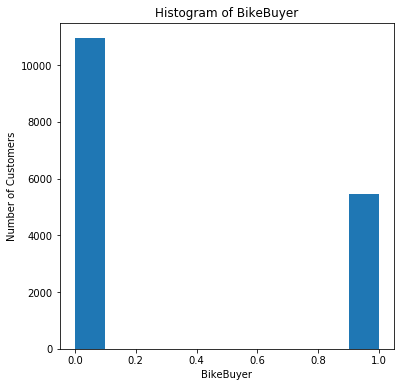

In [6]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical variables w/ pandas histograms plot.hist

def plot_histogram(AW_Custs_R, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        AW_Custs_R[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
            'TotalChildren', 'YearlyIncome', 'Age',  'AveMonthSpend', 'BikeBuyer']
plot_histogram(AW_Custs_R, num_cols)      

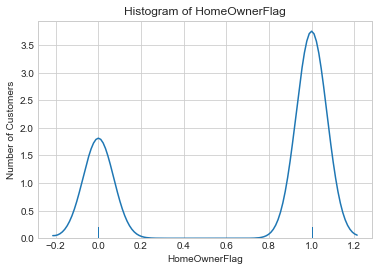

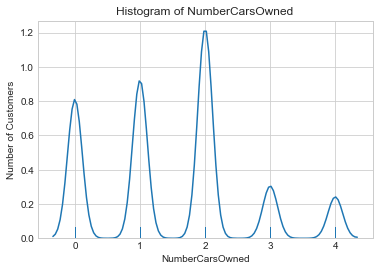

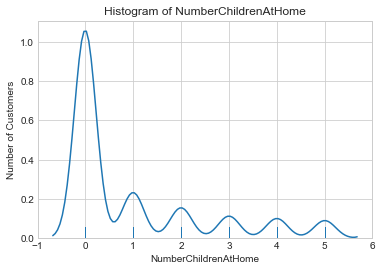

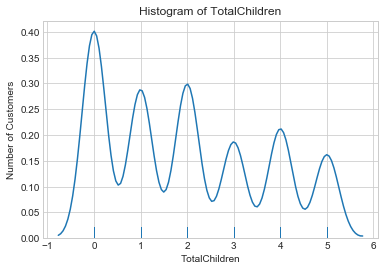

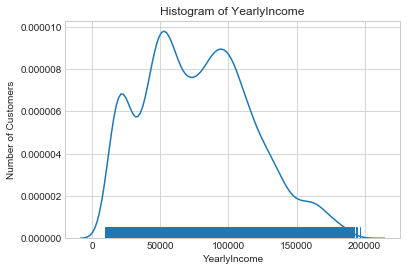

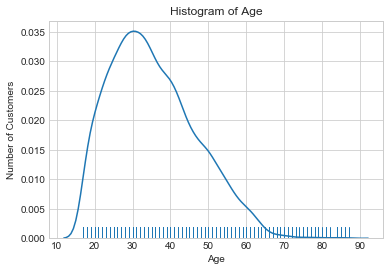

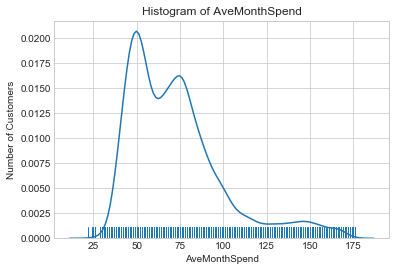

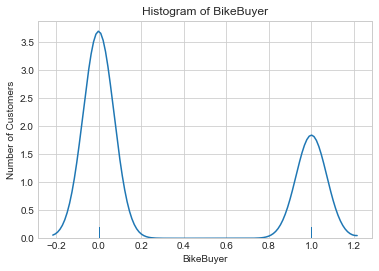

In [7]:
#Above- Many histograms are right-skewed & most cars are priced < $30,000
#Below- Kernel Density Estimation (KDE) plots provides a smooth denisty curve of data values w/ Seaborn distplot

def plot_density_hist(AW_Custs_R, cols, bins = 10, hist = False):
    for col in cols:        # Iterates over list of columns
        sns.set_style("whitegrid")     # Set style for plot grid
        sns.distplot(AW_Custs_R[col], bins = bins, rug = True, hist = hist)    # Use distplot type w/ rug along x-axis   
        plt.title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        plt.xlabel(col)    # Set x-axis labels w/ matplotlib
        plt.ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
#            'TotalChildren', 'YearlyIncome', 'Age', 'AveMonthSpend', 'BikeBuyer']
plot_density_hist(AW_Custs_R, num_cols)      

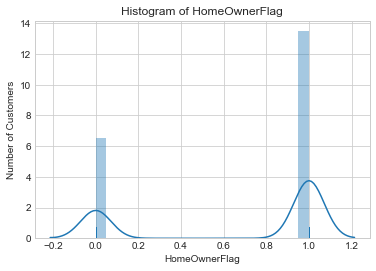

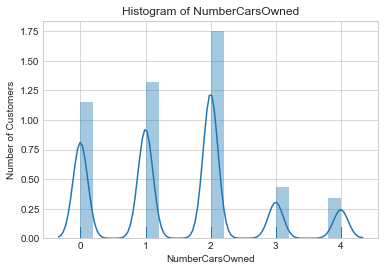

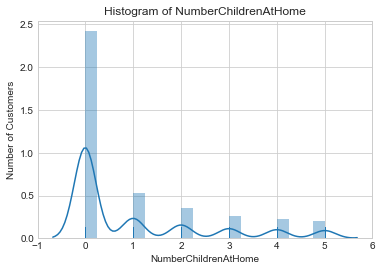

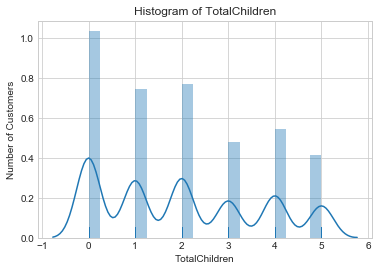

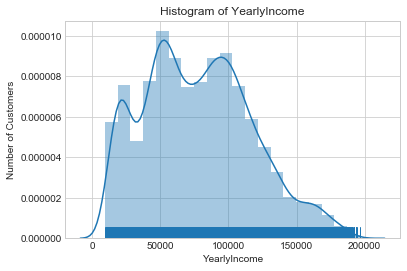

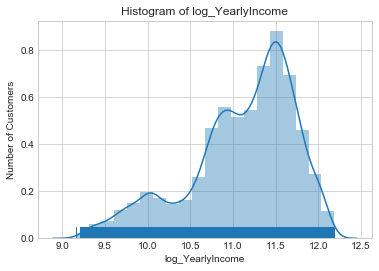

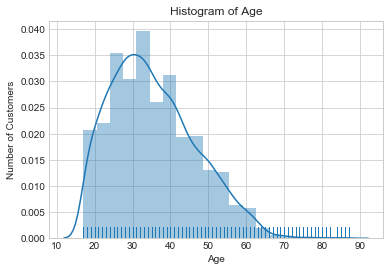

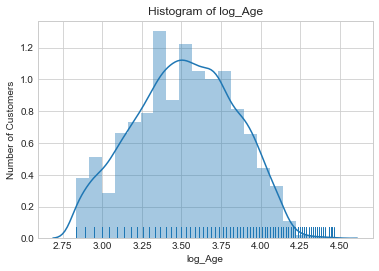

TypeError: unsupported operand type(s) for /: 'str' and 'int'

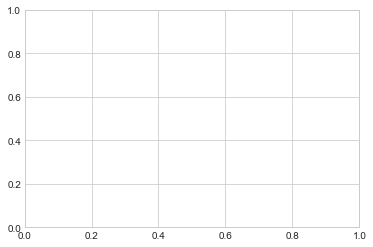

In [21]:
# Combine histogram & KDE plots w/ Seaborn

plot_density_hist(AW_Custs_R, num_cols, bins = 20, hist = True)

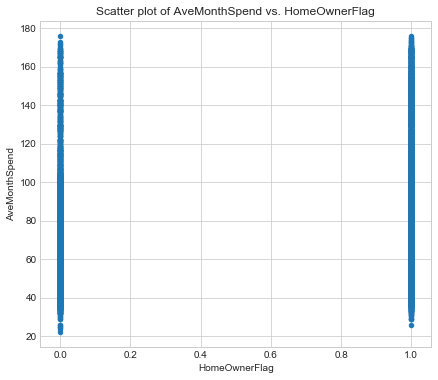

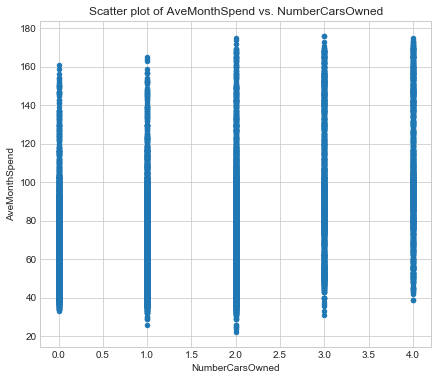

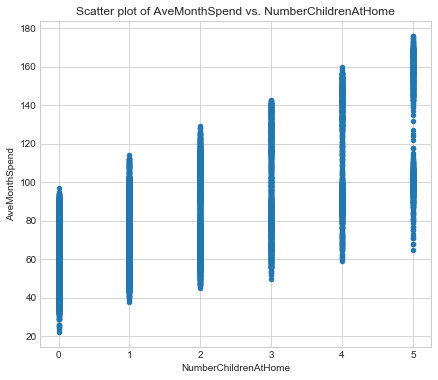

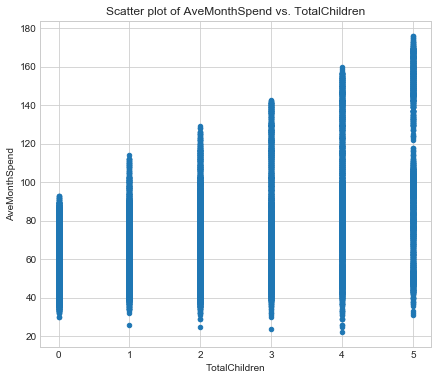

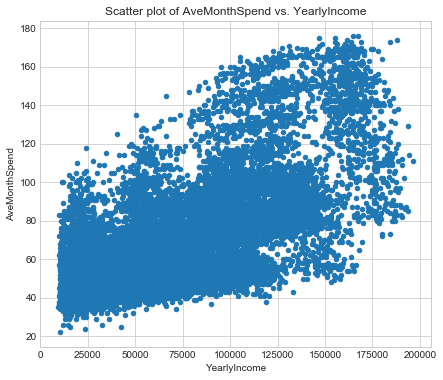

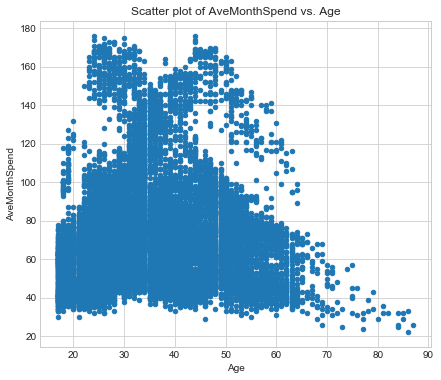

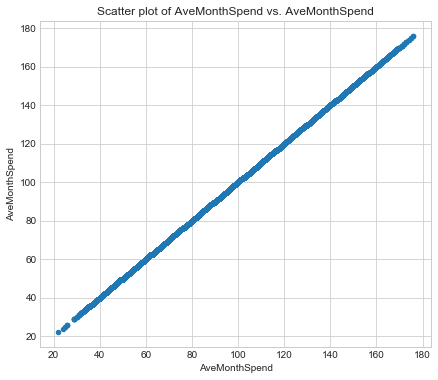

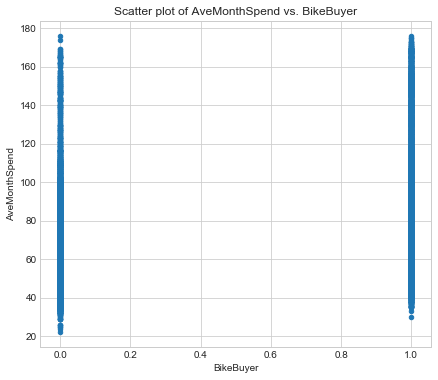

In [11]:
#Above- Shows multimodal distributions which may affect ML training model. Engine_size KDE resembles price distribution.

#Below- Visualize distributions w/ 2 Dimensional Plots (relationship b/w 2 variables [for ML is b/w features & label])
  #Step 1- Visualize frequency distributions scatter plots of numerical features vs label w/ pandas scatter plots plot.scatter

def plot_scatter(AW_Custs_R, cols, col_y = 'AveMonthSpend'):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(7,6))    # Figure plot & axis defined using matplotlib
        ax = fig.gca()
        AW_Custs_R.plot.scatter(x = col, y = col_y, ax = ax)    # Use plot.scatter method from pandas on subset of data frame   
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age', 'AveMonthSpend', 'BikeBuyer']
plot_scatter(AW_Custs_R, num_cols)      

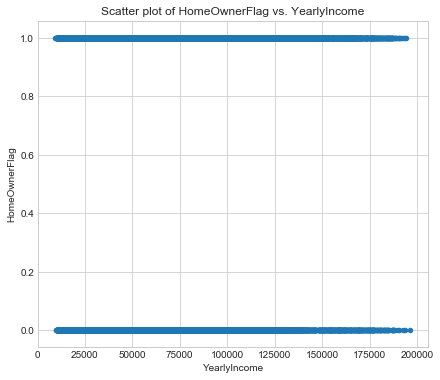

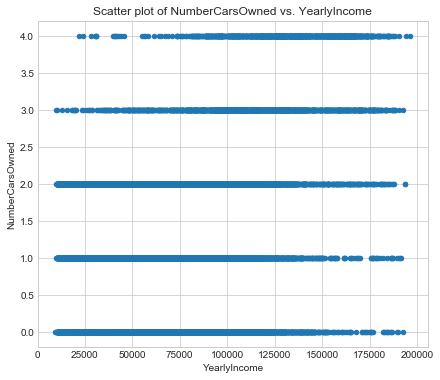

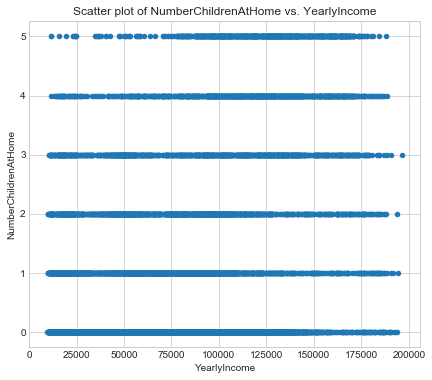

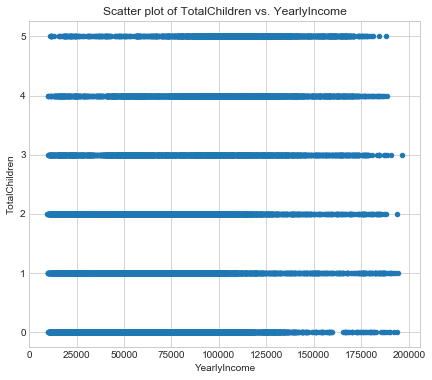

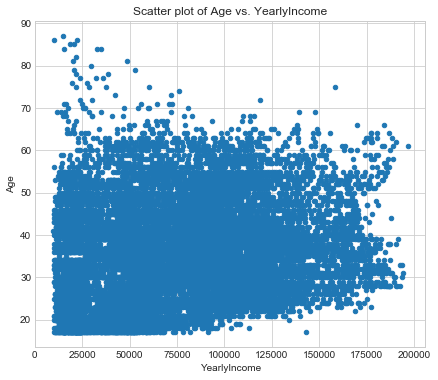

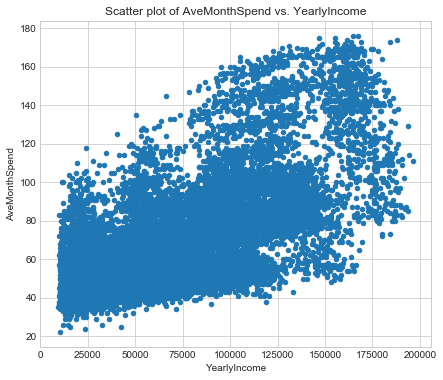

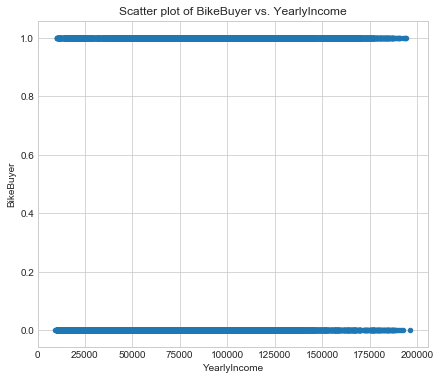

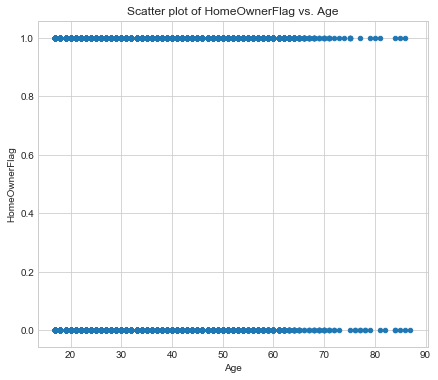

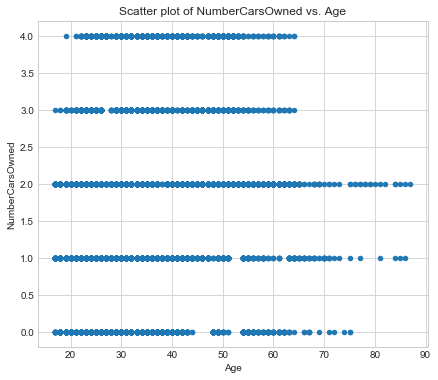

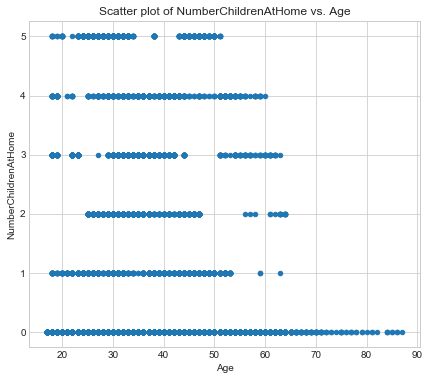

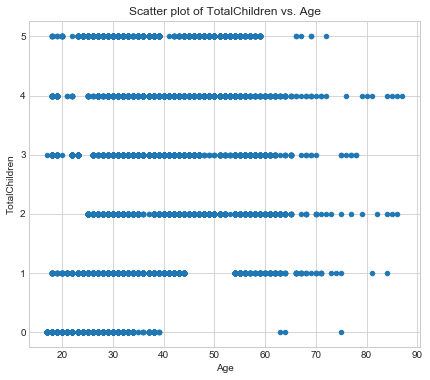

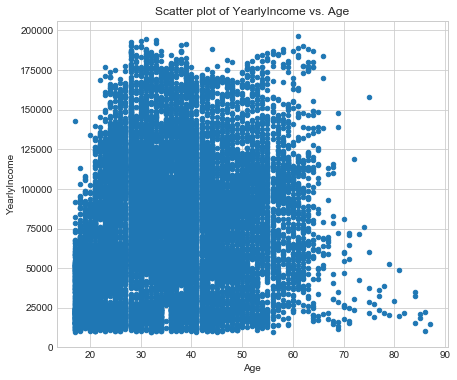

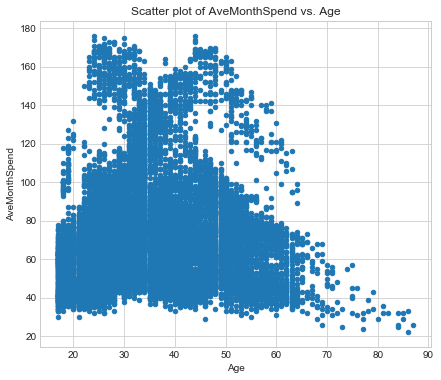

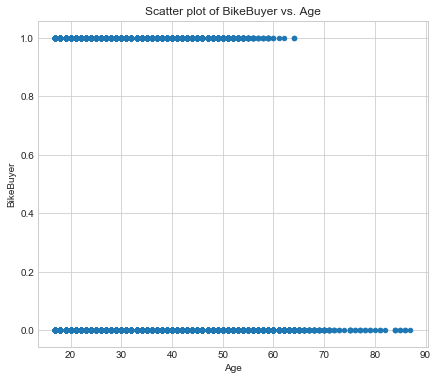

In [12]:
#Above- Strong relationship with label is NumberChildrenAtHome, TotalChildren, YearlyIncome, Age, & potentially NumberCarsOwned  
     #    where HomeOwnerFlag, BikeBuyer, & potenitally NumberCarsOwned are difficult to see relationship in these plots. 

#Below- Test if YearlyIncome and Age could be colinear numerical features

plot_scatter(AW_Custs_R, ['YearlyIncome'], 'HomeOwnerFlag')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'NumberCarsOwned')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'NumberChildrenAtHome')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'TotalChildren')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'Age')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'AveMonthSpend')
plot_scatter(AW_Custs_R, ['YearlyIncome'], 'BikeBuyer')
                 
    
plot_scatter(AW_Custs_R, ['Age'], 'HomeOwnerFlag')
plot_scatter(AW_Custs_R, ['Age'], 'NumberCarsOwned')
plot_scatter(AW_Custs_R, ['Age'], 'NumberChildrenAtHome')
plot_scatter(AW_Custs_R, ['Age'], 'TotalChildren')
plot_scatter(AW_Custs_R, ['Age'], 'YearlyIncome')
plot_scatter(AW_Custs_R, ['Age'], 'AveMonthSpend')
plot_scatter(AW_Custs_R, ['Age'], 'BikeBuyer')    

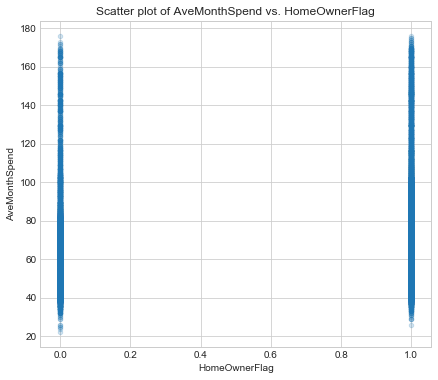

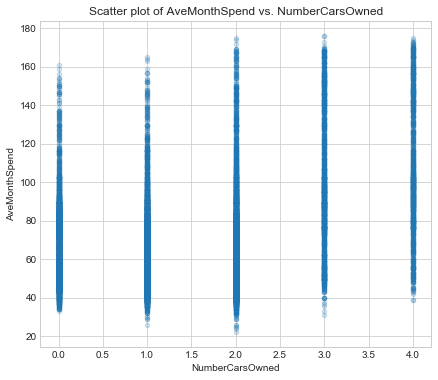

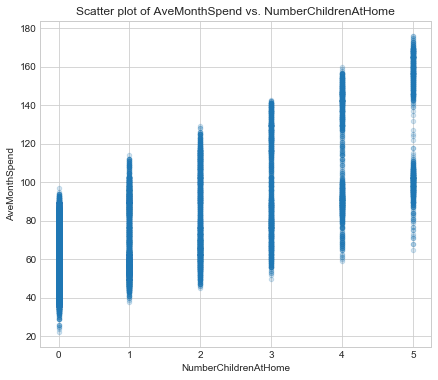

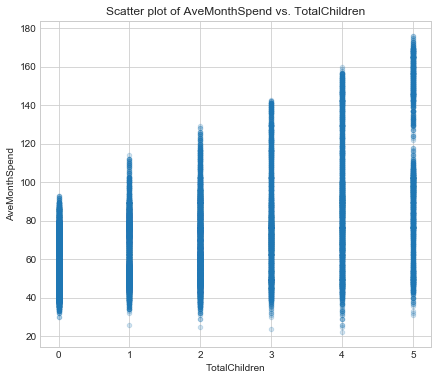

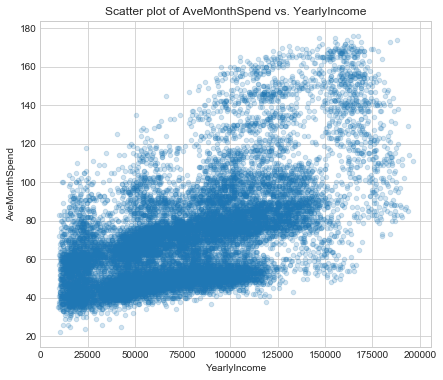

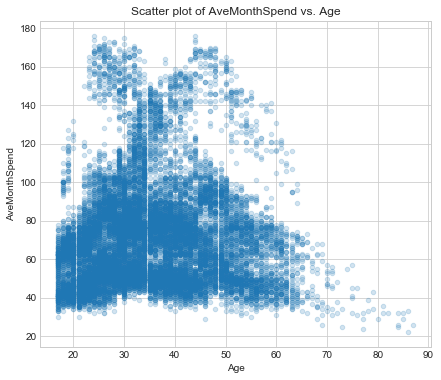

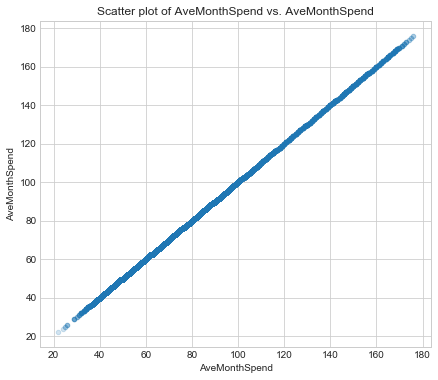

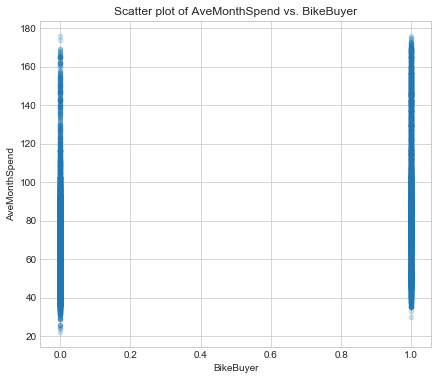

In [13]:
#Above- Nothing really seems to be linearly dependent on each other (we can't use them together in ML model), so we will use all features for regression.

#Below- Deal w/ Overplotting by using transparency

def plot_scatter_t(AW_Custs_R, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(7,6))    # Figure plot & axis defined using matplotlib
        ax = fig.gca()
        AW_Custs_R.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)    # Use plot.scatter method from pandas on subset of data frame   
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
#             'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer']
plot_scatter_t(AW_Custs_R, num_cols, alpha = 0.2)   # alpha=0.2 is high transparency

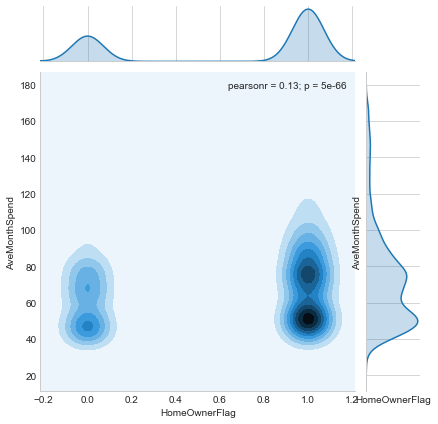

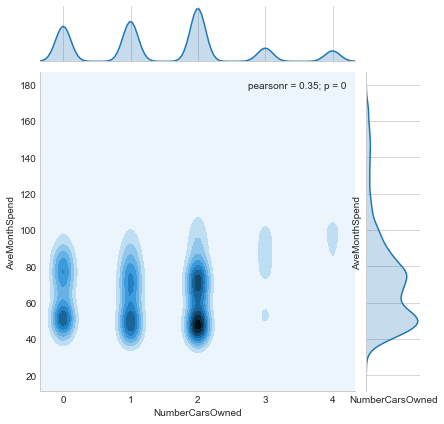

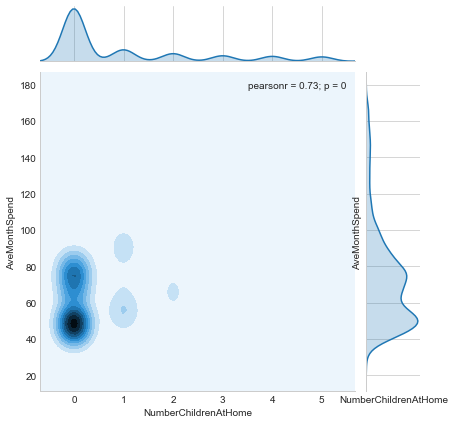

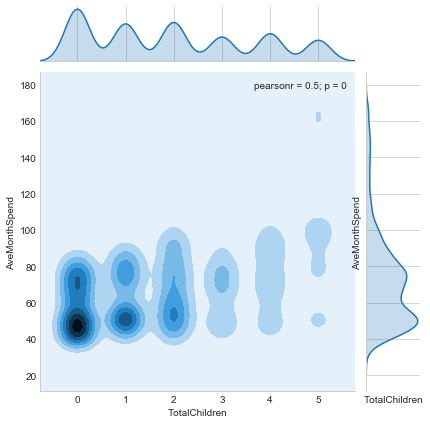

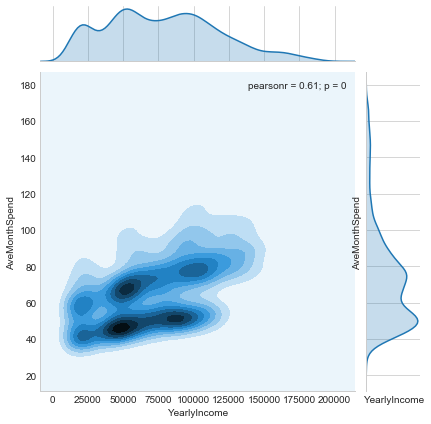

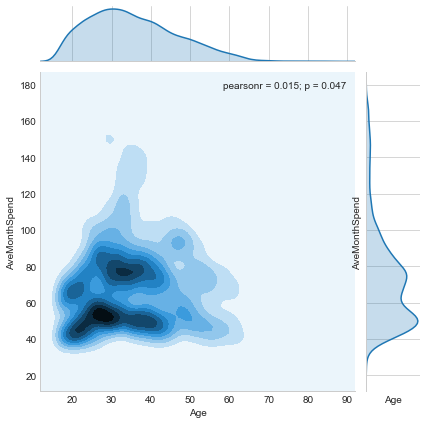

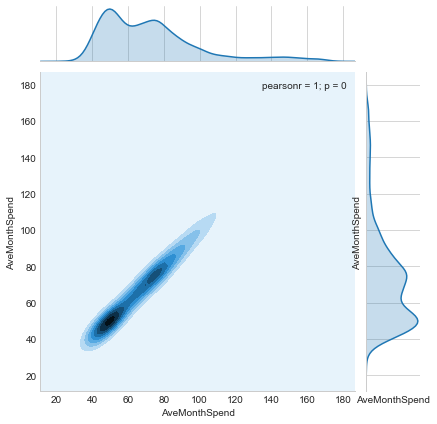

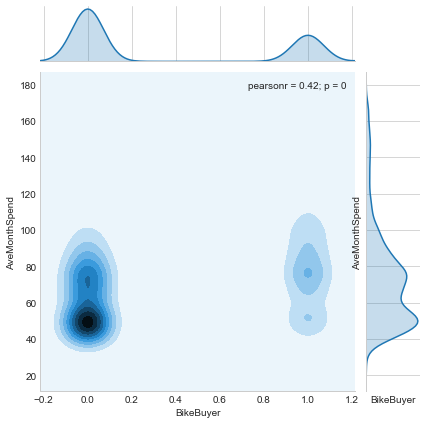

In [14]:
# Deal w/ Overplotting by using Countour plots or 2-D Density Plots w/ Seaborn jointplot

def plot_density_2d(AW_Custs_R, cols, col_y = 'AveMonthSpend', kind = 'kde'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.jointplot(col, col_y, data = AW_Custs_R, kind = kind)   # Use jointplot type from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel (col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_density_2d(AW_Custs_R, num_cols)   # Displays 1-D KDE plot slong w/ contour plot showing 2-D Density

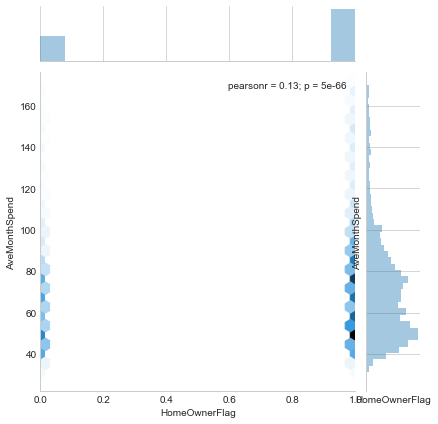

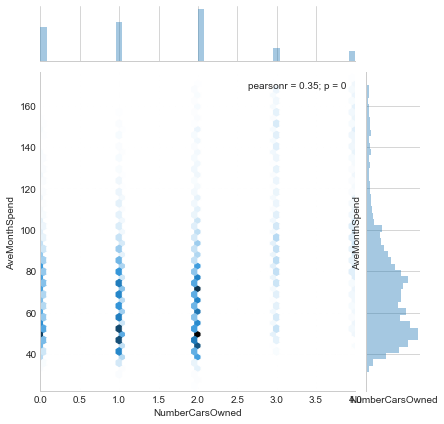

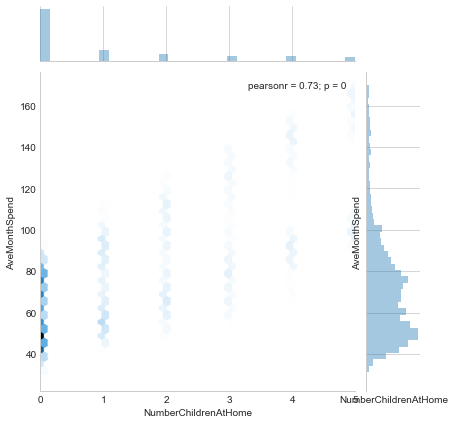

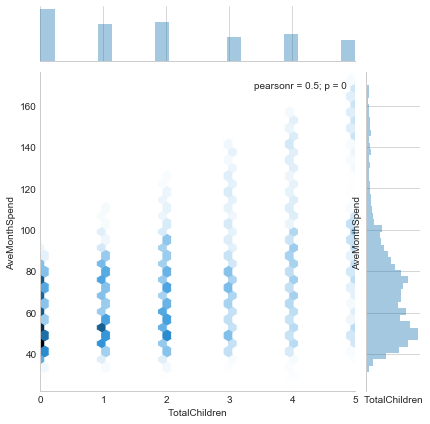

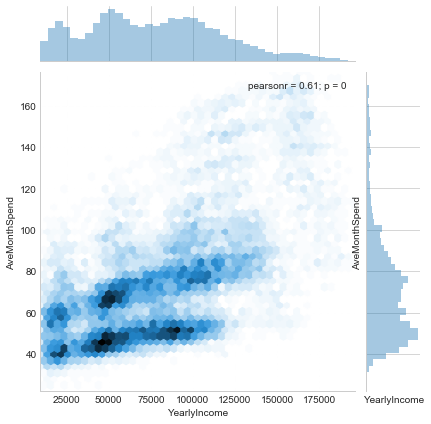

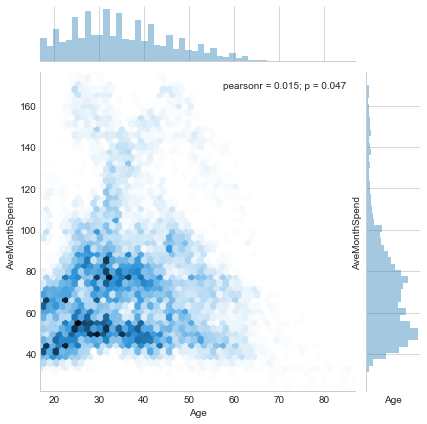

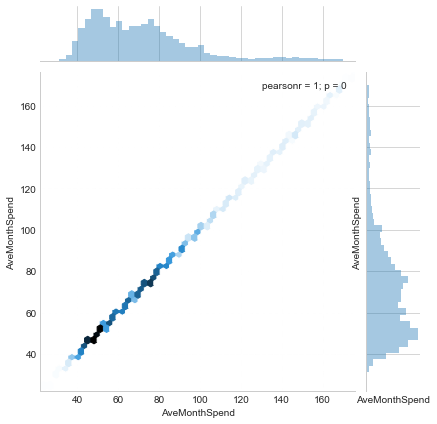

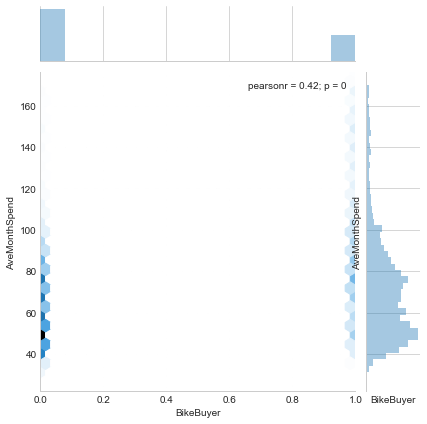

In [15]:
#Above- Shows 2-D multi-modal behavior for curb_weight, horsepower, city_mpg, & highway_mpg

#Below- Deal w/ Overplotting by using Hexbin plots

plot_density_2d(AW_Custs_R, num_cols, kind = 'hex')   #Hexbin shows density of points as 2-D histogram and 1-D histogram of each variable

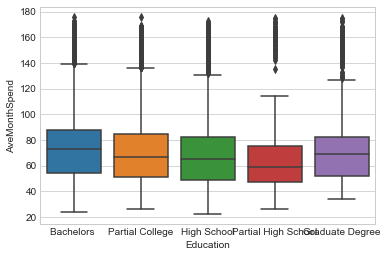

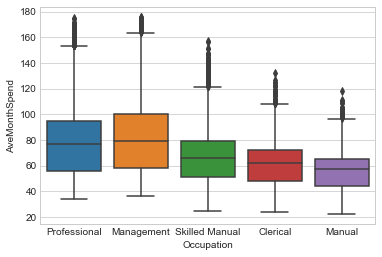

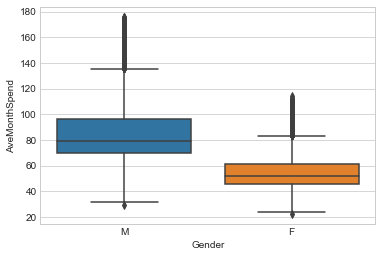

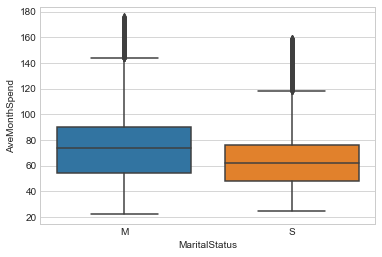

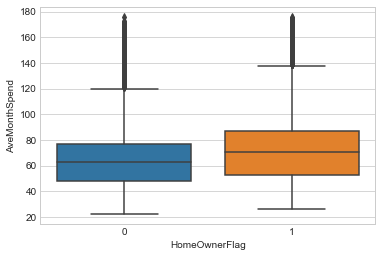

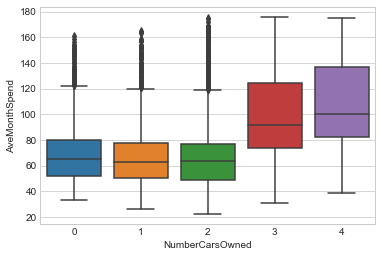

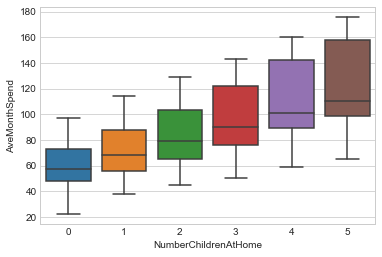

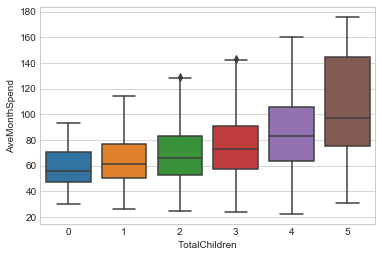

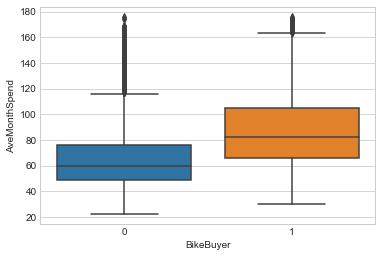

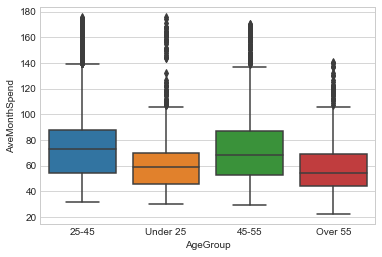

In [27]:
#Above- Hexbin shows more detail since cells w/ 1 point are displayed

#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol

def plot_box(AW_Custs_R, cols, col_y = 'AveMonthSpend'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = AW_Custs_R)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus','HomeOwnerFlag',
              'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer', 'AgeGroup']
# Remove AddressLine1,'FirstName', 'LastName', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
plot_box(AW_Custs_R, cat_cols)

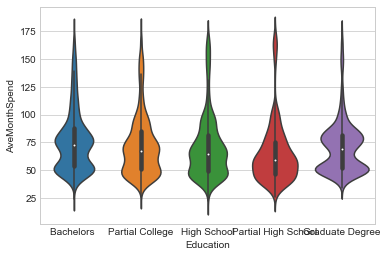

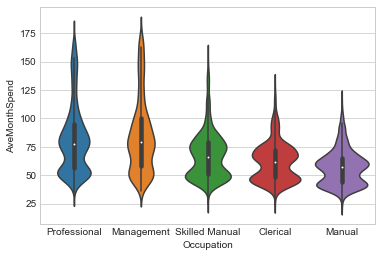

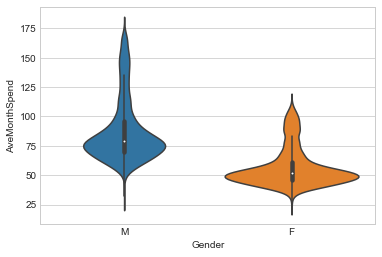

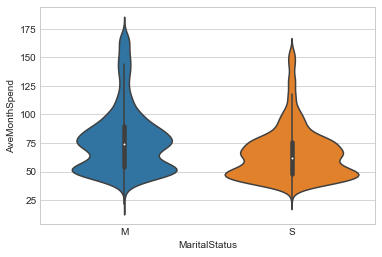

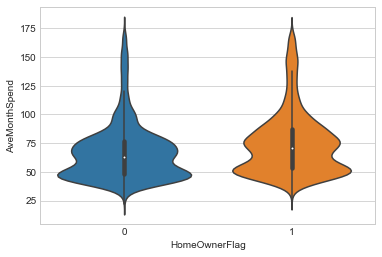

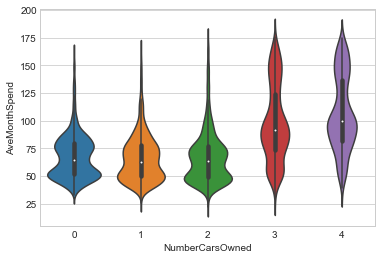

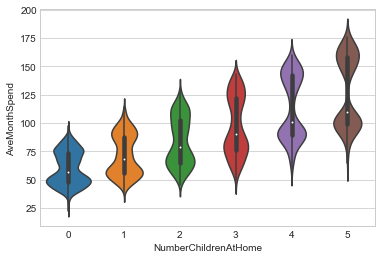

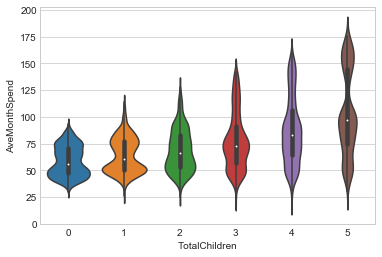

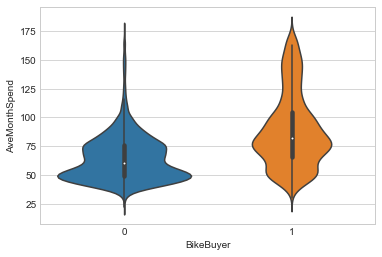

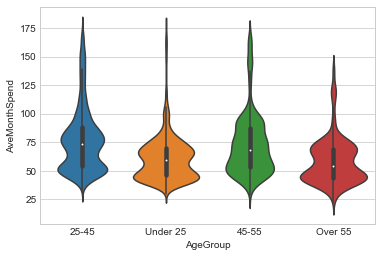

In [28]:
#Above- Gender does look to have a relationship with AveMonthSpend

# Plot Categorical & Numerical Variables w/ Seaborn Violin Plots

def plot_violin(AW_Custs_R, cols, col_y = 'AveMonthSpend'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.violinplot(col, col_y, data = AW_Custs_R)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
#cat_cols = ['FirstName', 'LastName', 'AddressLine1', 'City',
#            'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 
#             'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
#              'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']
plot_violin(AW_Custs_R, cat_cols)

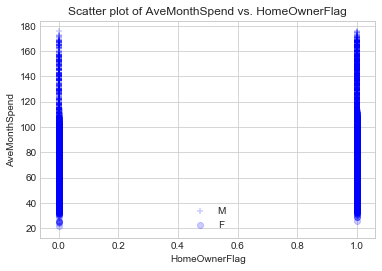

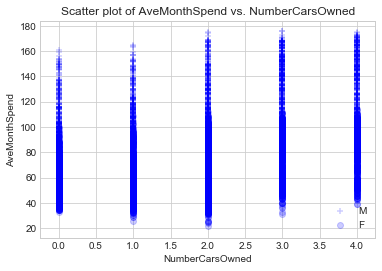

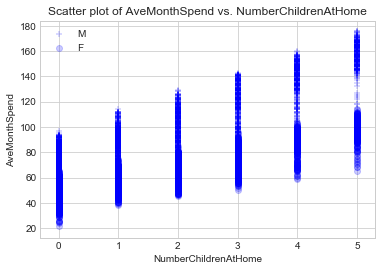

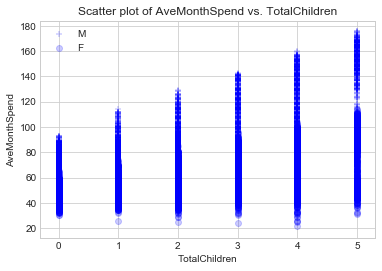

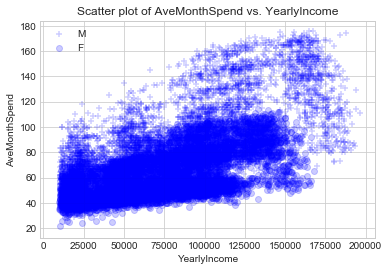

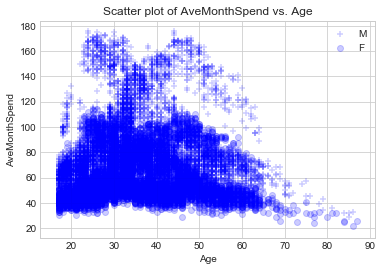

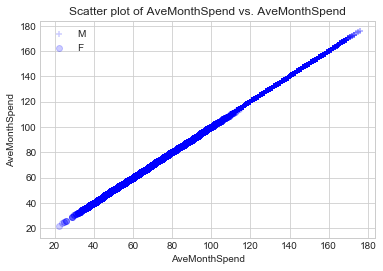

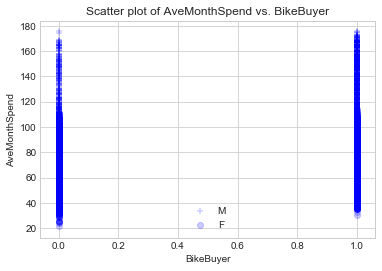

In [18]:
#Above- Majority of plots don't show much of a relationship, but Gender does have a relationship with AveMonthSpend.

#Below- Additional Dimensions to Plots Using Aethetics
   # Marker Shape - must use varying distinct shapes

def plot_scatter_shape(AW_Custs_R, cols, shape_col = 'Gender', col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^']     # pick distinct shapes
    unique_cats = AW_Custs_R[shape_col].unique()
    for col in cols:    # loop over columns in order to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats):      # loop over unique categories
            temp = AW_Custs_R[AW_Custs_R[shape_col] == cat]
            sns.regplot(col, col_y, data = temp, marker = shapes[i], label = cat,
                        scatter_kws = {"alpha":alpha}, fit_reg = False, color = 'blue')     #Matplotlib dictonary for transparency, the key is argument, alpha, and the value is the argument value
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col)     # Title for plot
        plt.xlabel(col)     # Label for x-axis
        plt.ylabel(col_y)     # Label for y-axis
        plt.legend()     # Legend for plot
        plt.show()
        
#num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
#             'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer']
plot_scatter_shape(AW_Custs_R, num_cols)

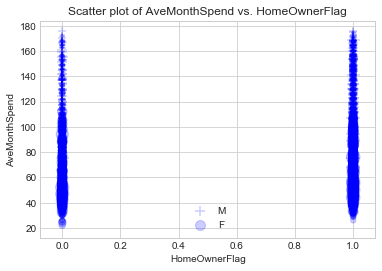

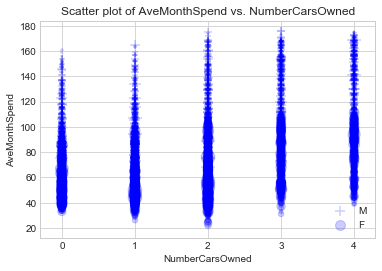

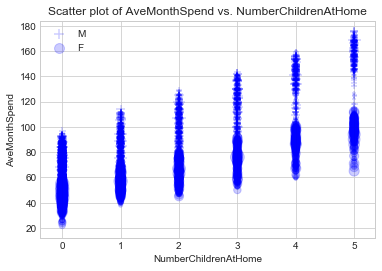

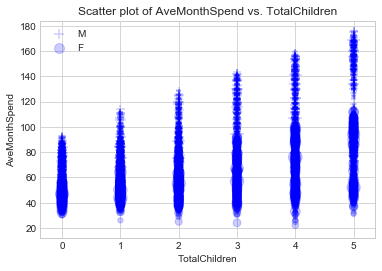

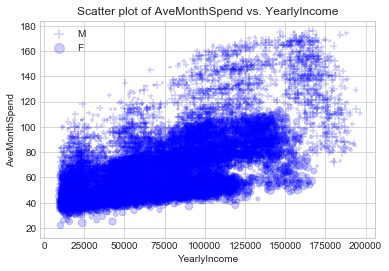

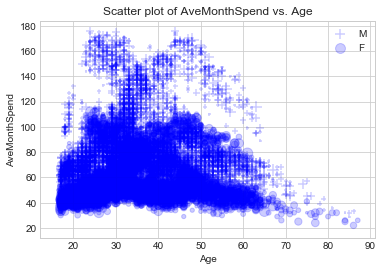

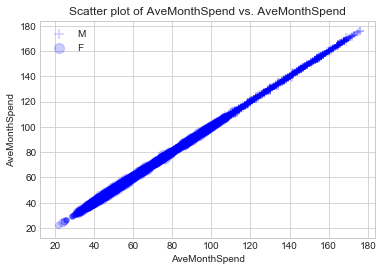

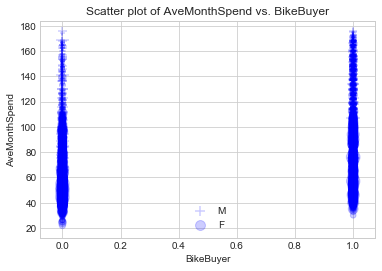

In [22]:
#Above - Relationships b/w features YearlyIncome (potentially) w/ label AveMonthSpend.
 # Gender is a significant feautre for determining AveMonthSpend. It seems Males have w/ higher YearlyIncome spend more, & males b/w 20-50 spend more.
    
#Below- Marker Size

def plot_scatter_size(AW_Custs_R, cols, shape_col = 'Gender', size_col = 'Age',
                      size_mul = 0.025, col_y = 'AveMonthSpend', alpha = 0.2):     # Size is scaled by squaring and multiplied by convient multiplier in Matplotlib since it typically uses area (below).
    shapes = ['+', 'o', 's', 'x', '^']     # use distinct shapes
    unique_cats = AW_Custs_R[shape_col].unique()
    for col in cols:     #loops over all columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats):     # Loops over unique categories
            temp = AW_Custs_R[AW_Custs_R[shape_col] == cat]
            sns.regplot(col, col_y, data = temp, marker = shapes[i], label = cat,
                        scatter_kws = {"alpha":alpha, "s":size_mul*AW_Custs_R[size_col]**2},
                        fit_reg = False, color = 'blue')     #Matplotlib dictonary for transparency, the key is argument, alpha, and the value is the argument value.
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col)     # Label plot w/ title
        plt.xlabel(col)     # Label x-axis
        plt.ylabel(col_y)     # Label y-axis
        plt.legend()     # Ledgend for plot
        plt.show()
        
plot_scatter_size(AW_Custs_R, num_cols)

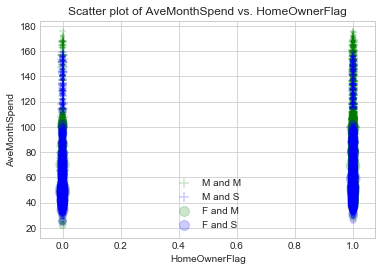

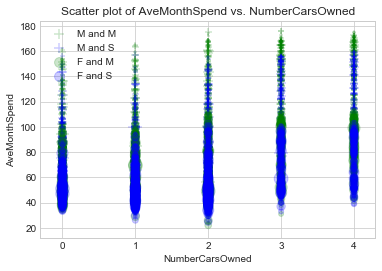

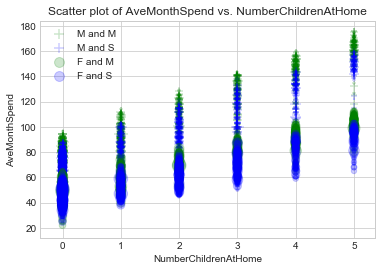

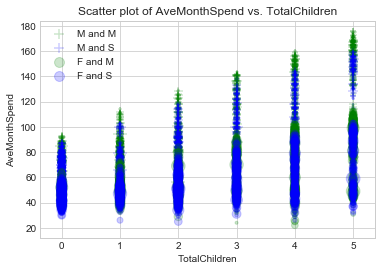

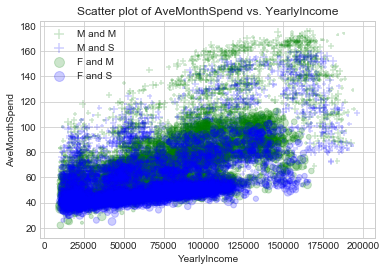

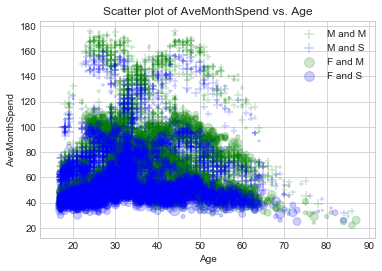

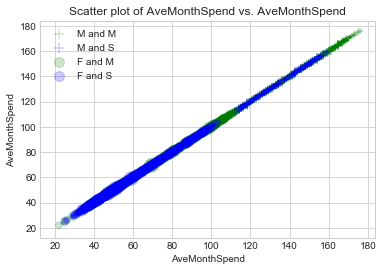

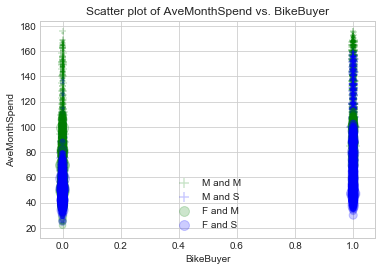

In [25]:
#Above - Relationships b/w features curb_weight, engine_size, horsepower, w/ label price.
 # Fuel type is a significant feautre for compression_ratio. These show 4 dimensions on 2D plots.

#Below - Color in scatter plots (remember some people are green-red color blind)

def plot_scatter_shape_size_col(AW_Custs_R, cols, shape_col = 'Gender', size_col = 'Age',
                      size_mul = 0.025, color_col = 'MaritalStatus', col_y = 'AveMonthSpend', alpha = 0.2):     # Size is scaled by squaring and multiplied by convient multiplier in Matplotlib since it typically uses area (below).
    shapes = ['+', 'o', 's', 'x', '^']     # use distinct shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray']     # Use distint colors
    unique_cats = AW_Custs_R[shape_col].unique()
    unique_colors = AW_Custs_R[color_col].unique()
    for col in cols:     #loops over all columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats):     # Loops over unique categories
            for j, color in enumerate(unique_colors):
                temp = AW_Custs_R[(AW_Custs_R[shape_col] == cat) & (AW_Custs_R[color_col] == color)]
                sns.regplot(col, col_y, data = temp, marker = shapes[i], 
                        scatter_kws = {"alpha":alpha, "s":size_mul*AW_Custs_R[size_col]**2},
                        label = (cat + ' and ' + color), fit_reg = False, color = colors[j])     #Matplotlib dictonary for transparency, the key is argument, alpha, and the value is the argument value.
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col)     # Label plot w/ title
        plt.xlabel(col)     # Label x-axis
        plt.ylabel(col_y)     # Label y-axis
        plt.legend()     # Ledgend for plot
        plt.show()
        
plot_scatter_shape_size_col(AW_Custs_R, num_cols)
    

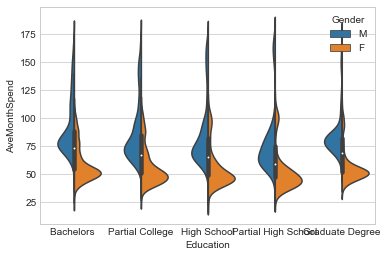

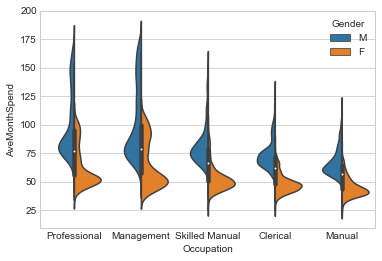

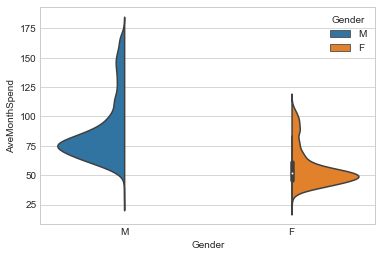

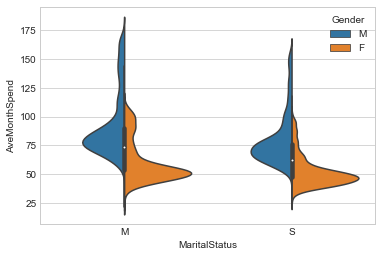

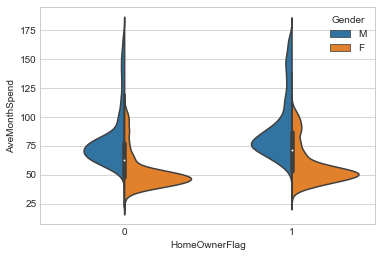

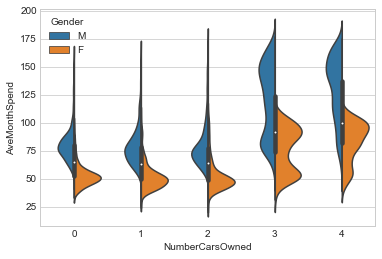

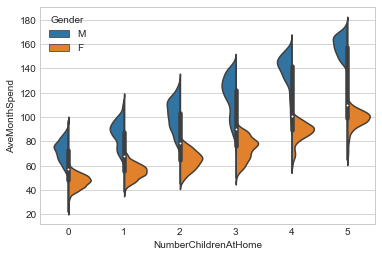

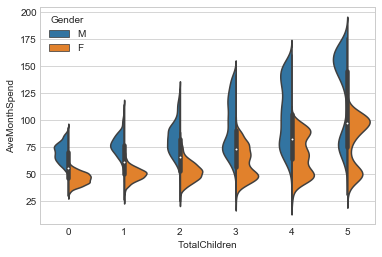

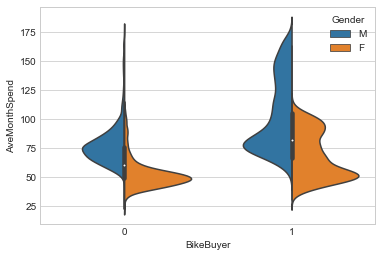

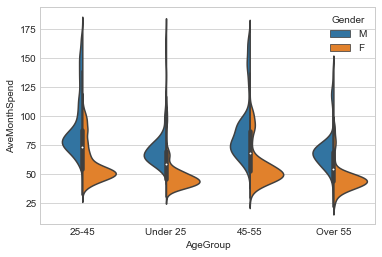

In [29]:
#Above- Married males and females tend to have higher AveMonthSpend than singles.
  # Each plots shows 5 dimensions of data in 2D plot. Gas & diesel turbo auto are more expensive and have worse city_mpg
 # at a given price point but has greater horsepower at a given price point than standard cars.
    
#Below- Color(hue) in split violin plots

def plot_violin_hue(AW_Custs_R, cols, col_y = 'AveMonthSpend', hue_col = 'Gender'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data = AW_Custs_R, hue = hue_col, split = True)
        plt.xlabel(col)     # Label x-axis
        plt.ylabel(col_y)     # Label y-axis
        plt.show()
        
plot_violin_hue(AW_Custs_R,cat_cols)

C:\Users\Samantha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Samantha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Samantha\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Samantha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\contour.py:1534: UserWa

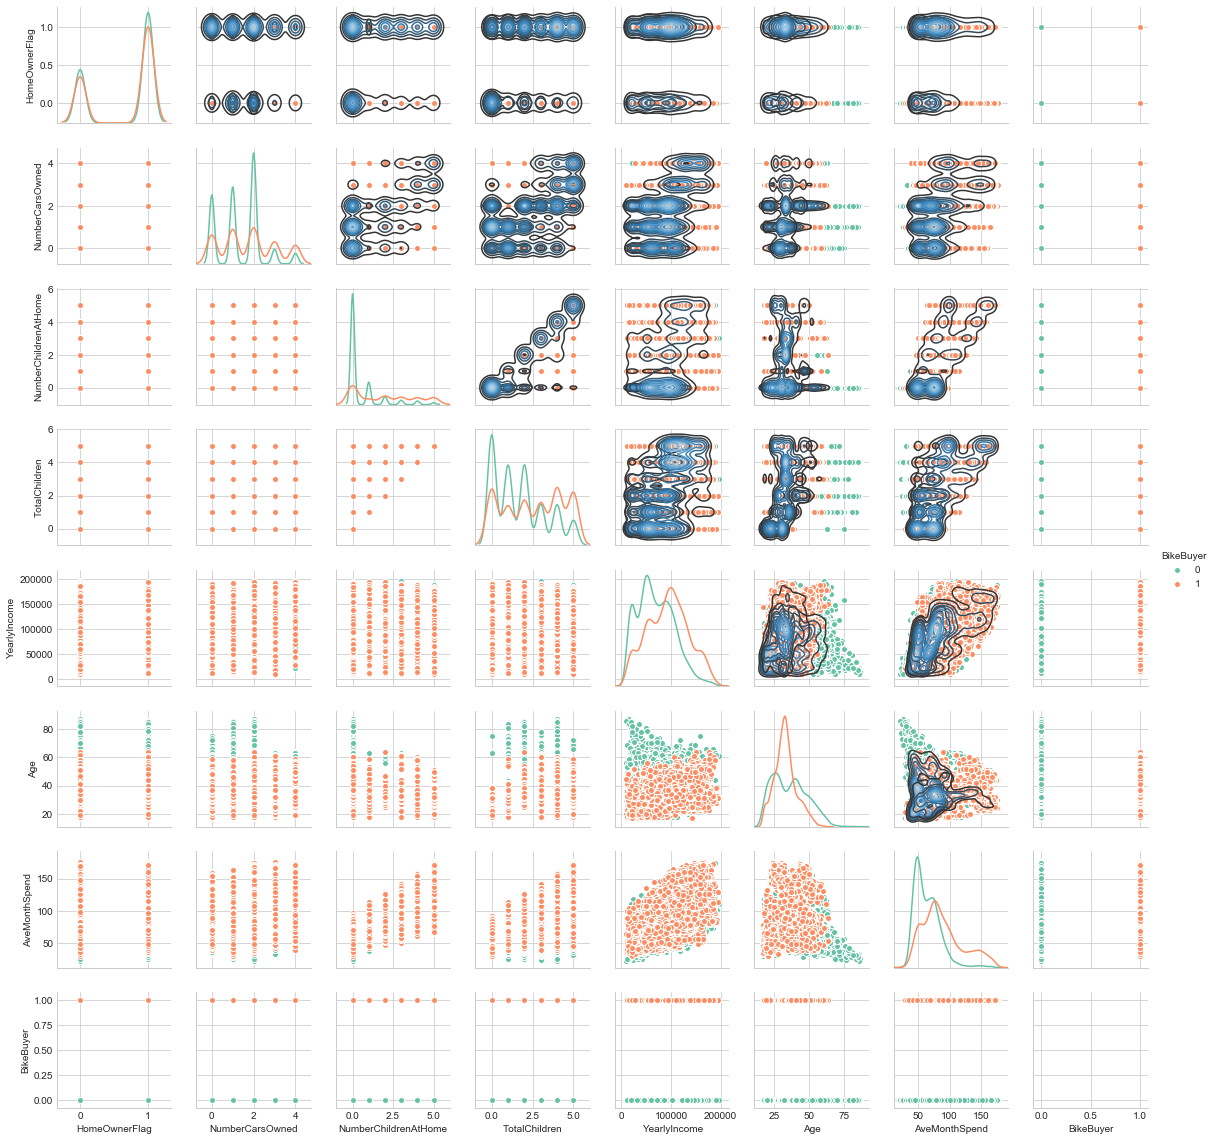

In [30]:
#Above- Feature of Gender is very important to AveMonthSpend (label).

#Below- Multi-axis plots
 # Pair-wise Scatter Plot using pairplot & map_upper in seaborn
    
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age', 'AveMonthSpend', 'BikeBuyer']
sns.pairplot(AW_Custs_R[num_cols], hue = 'BikeBuyer', palette = "Set2", diag_kind = "kde", size = 2).map_upper(sns.kdeplot, cmap = "Blues_d")

'Gender'

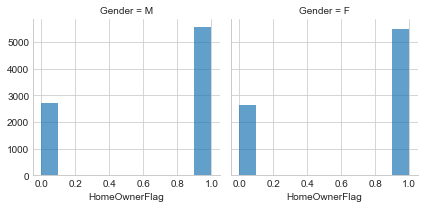

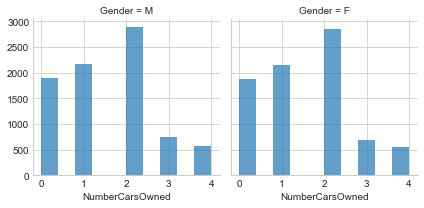

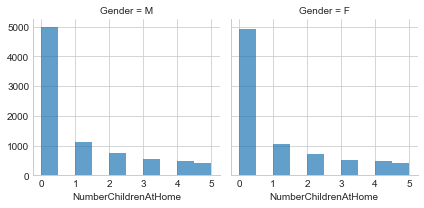

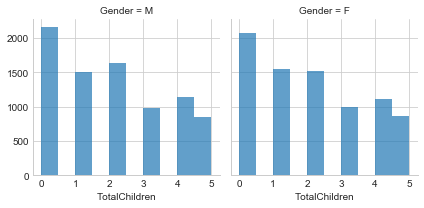

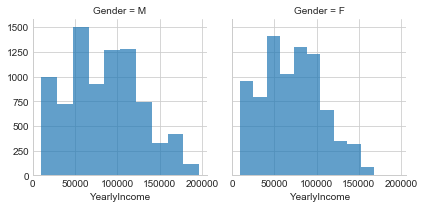

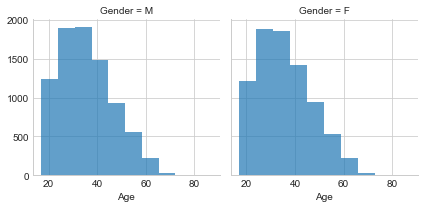

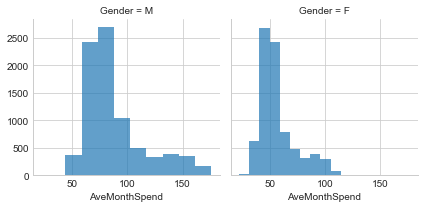

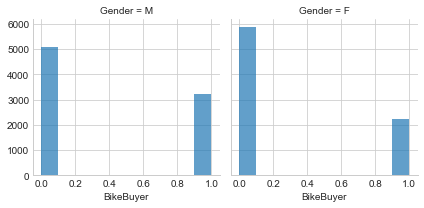

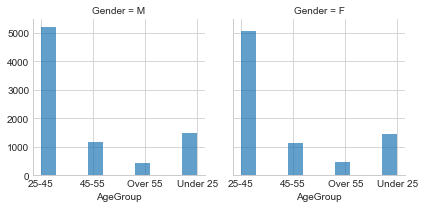

In [31]:
"""
Above- Every combination of cross plots for all features are shown. Scatter plots below the
  diagonal. KDE's in the diagonal, and contour plots of 2D density estimate above the diagonal.
  *Colinearity is displayed for horsepower, engine_size, and curb-weight, thus these features should NOT be used for training machine learning model.
  *Most all of the features show strong relationship with with price (label), such as curb_weight, horsepower, engine_size, & city_mpg.
  *Distinctly different behavior for gas vs. diesel autos.
  *Most distributions are asymmetric.
"""
#Below- Conditioned (group-by operation) Histogram Plots using matplotlib & seaborn

##Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ##loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)     # Defines grid object over which plots are displayed, argument is Pandas dataframe & grouping variables for rows & columns
        grid1.map(plt.hist, col, alpha = 0.7)     # Map method displays/maps the histogram plot function over plot grid.
    return grid_col

##Define columns for making a conditioned histogram
plot_cols2 = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age', 'AveMonthSpend', 'BikeBuyer', 'AgeGroup']

cond_hists(AW_Custs_R, plot_cols2, 'Gender')

C:\Users\Samantha\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


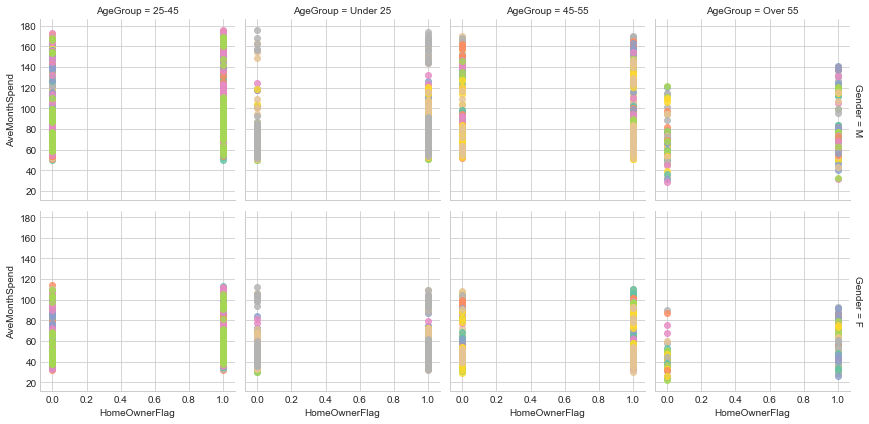

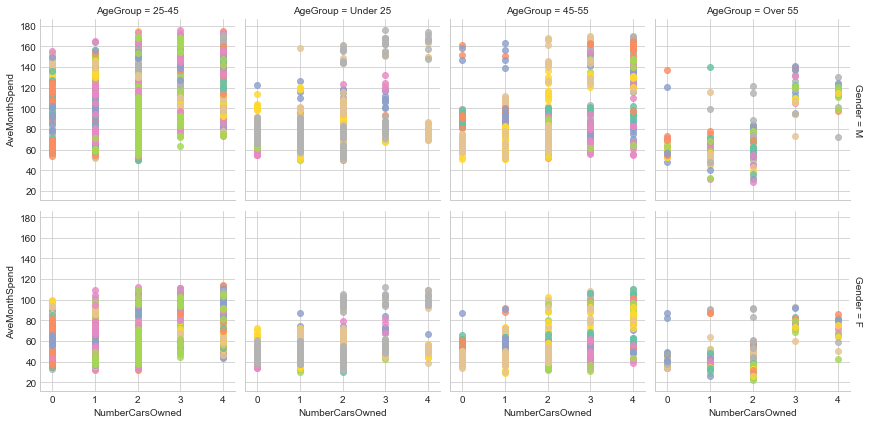

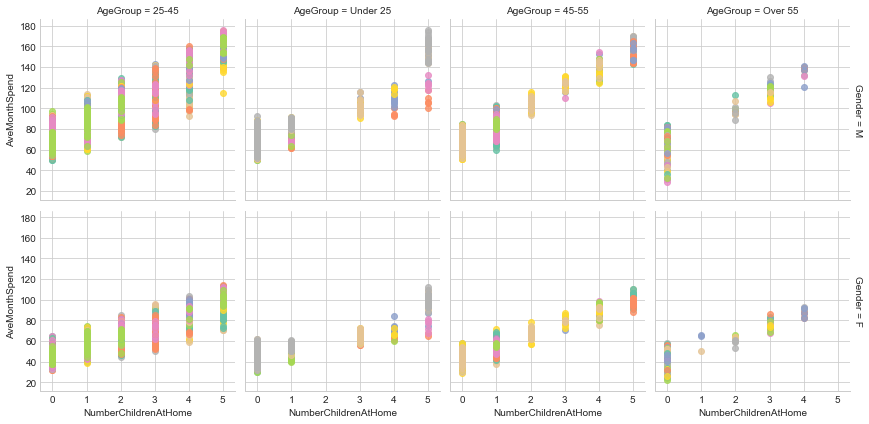

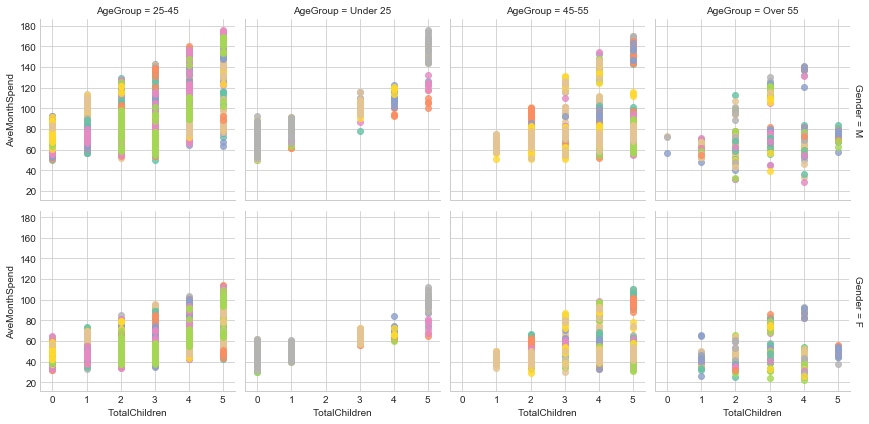

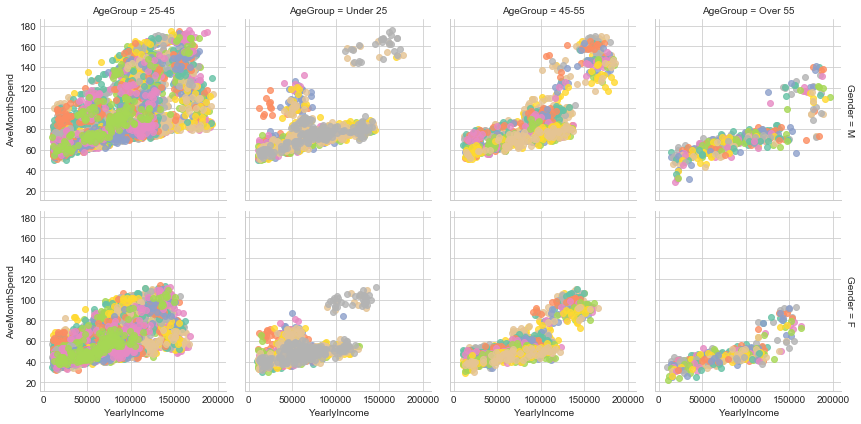

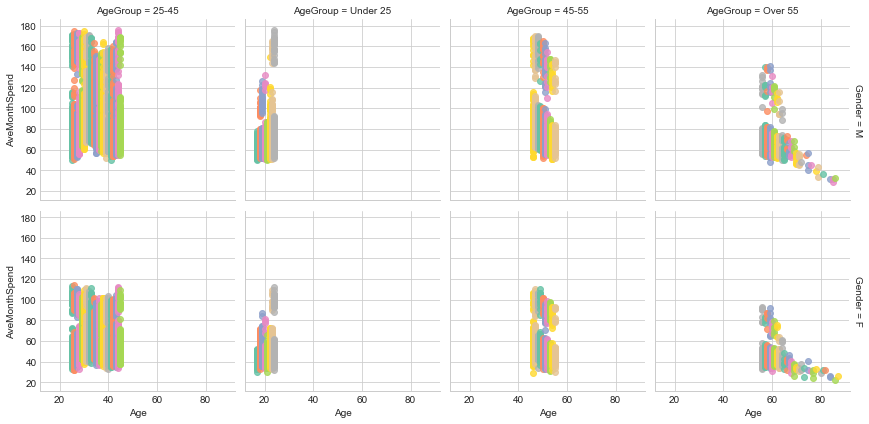

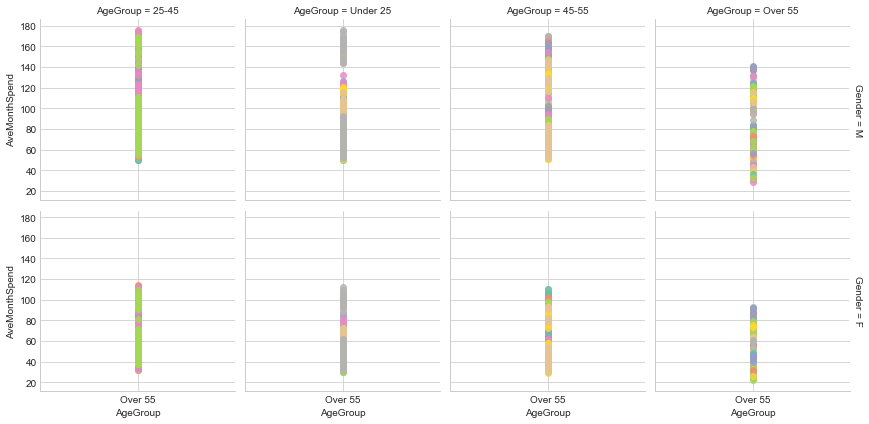

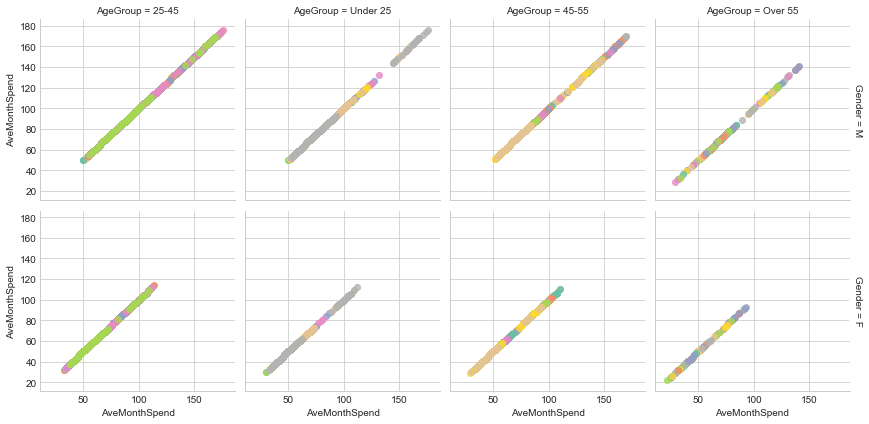

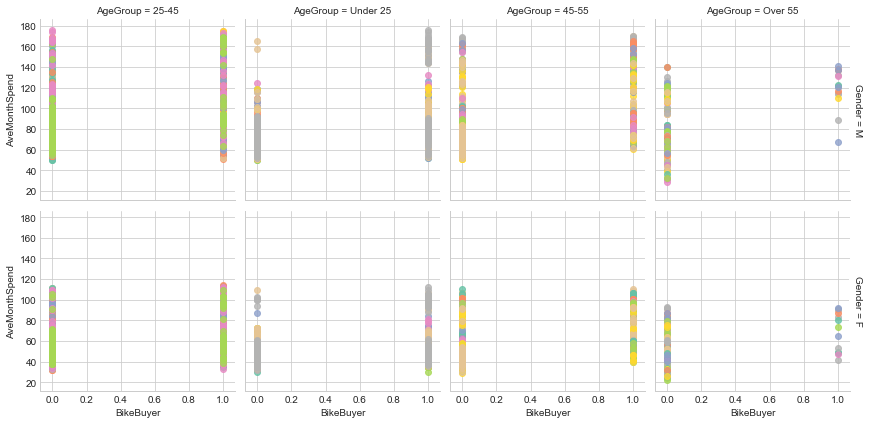

In [32]:
#Above- 4wd autos have lowest price, but rwd has widest range. Autos w/ fwd has highest city_mpg whereas 4wd & rwd is similiar.
 # Higher distribution values for length & curb_weight for rwd, where values for 4wd & rwd overlap.

#Below- Conditioned Scatter Plots using Seaborn

def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(AW_Custs_R, col = "AgeGroup", row = "Gender",
                          hue = "Age", palette = "Set2", margin_titles = True)
        g.map(sns.regplot, col, "AveMonthSpend", fit_reg = False)
    
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age','AgeGroup', 'AveMonthSpend', 'BikeBuyer']
cond_plot(num_cols)


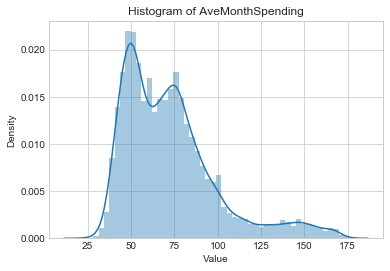

In [9]:
#Display current histogram & distribution of price
def hist_plot(vals, lab):
    sns.distplot(vals)  #distribution plot of values
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')   #Label of x-axis
    plt.ylabel('Density')  #Label of y-axis
    
hist_plot(AW_Custs_R['AveMonthSpend'], 'AveMonthSpending')

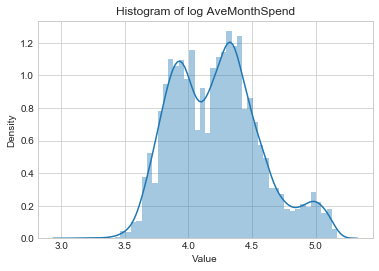

In [10]:
#Above- Distribution is multi-modal left skewed
  #Log transformation can work for skewed data w/out values =<0
    
AW_Custs_R['log_AveMonthSpend'] = np.log(AW_Custs_R['AveMonthSpend'])
hist_plot(AW_Custs_R['log_AveMonthSpend'], 'log AveMonthSpend')

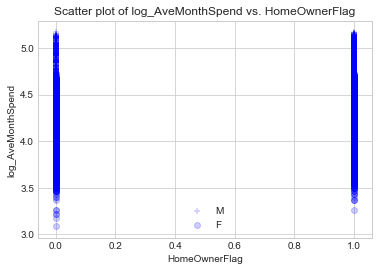

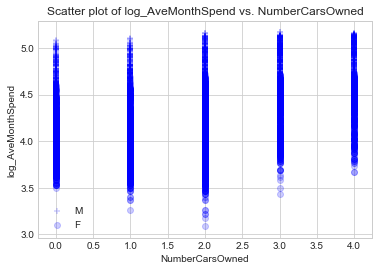

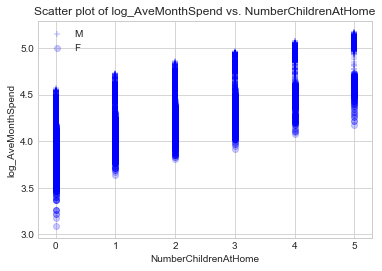

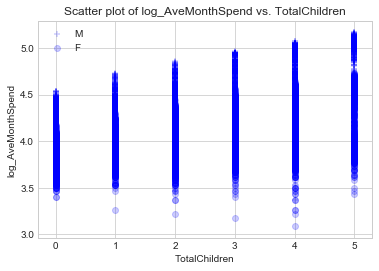

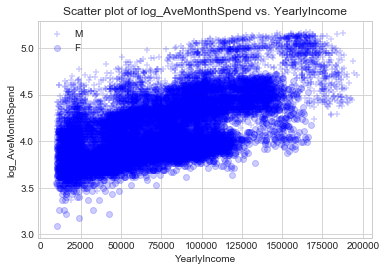

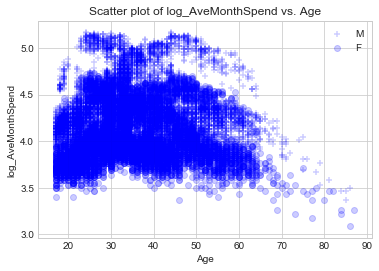

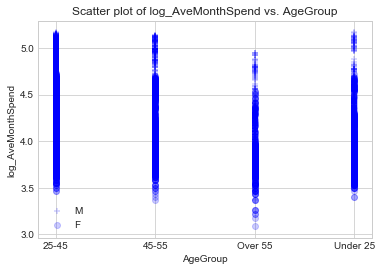

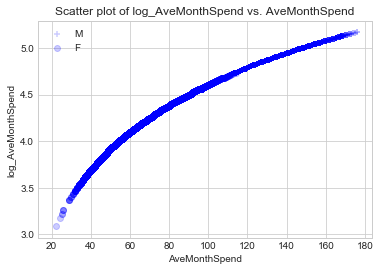

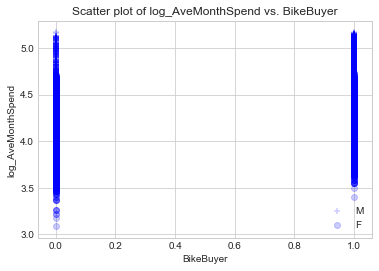

In [12]:
#Above- Distribution looks more symmetric, but still multi-modal and some skew indicated.
 # This is still an improvement over the raw AveMonthSpend.
    
#Check how new log transform of label changes relationship w/ numeric features
def plot_scatter_shape(AW_Custs_R, cols, shape_col = 'Gender', col_y = 'log_AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = AW_Custs_R[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = AW_Custs_R[AW_Custs_R[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age','AgeGroup', 'AveMonthSpend', 'BikeBuyer']
plot_scatter_shape(AW_Custs_R, num_cols)

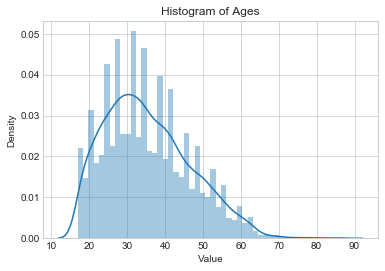

In [13]:
#Display current histogram & distribution of Age
def hist_plot(vals, lab):
    sns.distplot(vals)  #distribution plot of values
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')   #Label of x-axis
    plt.ylabel('Density')  #Label of y-axis
    
hist_plot(AW_Custs_R['Age'], 'Ages')

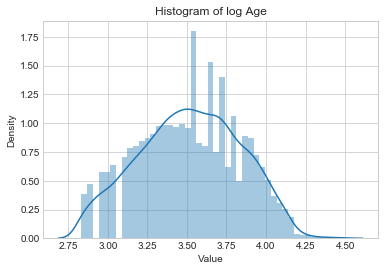

In [14]:
#Above- Distribution is slightly left skewed
  #Log transformation can work for skewed data w/out values =<0
    
AW_Custs_R['log_Age'] = np.log(AW_Custs_R['Age'])
hist_plot(AW_Custs_R['log_Age'], 'log Age')

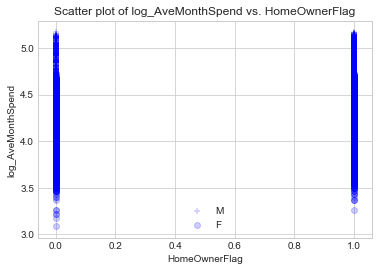

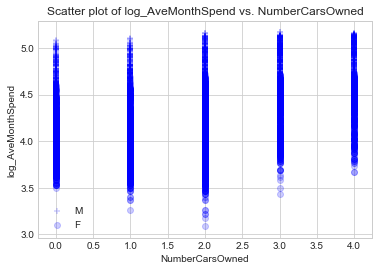

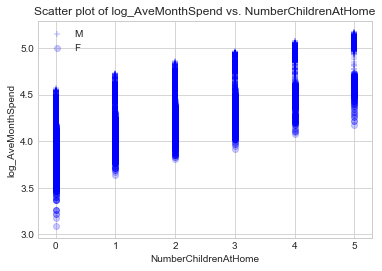

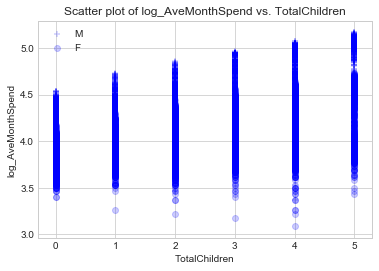

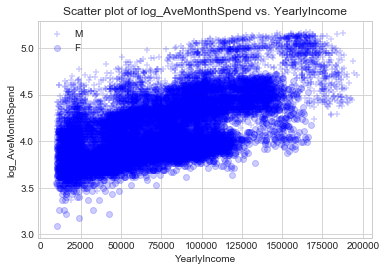

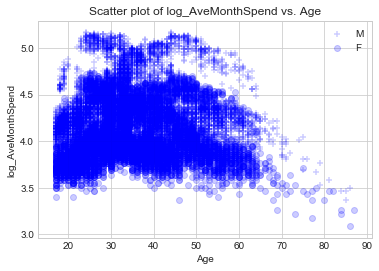

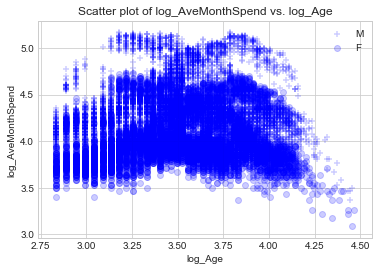

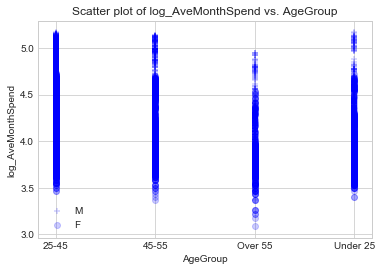

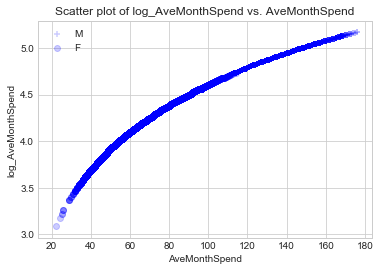

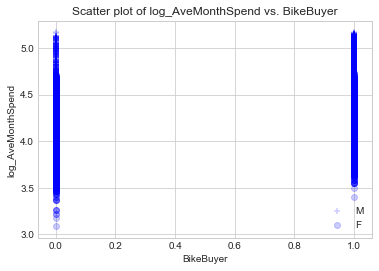

In [15]:
#Above- Distribution looks more symmetric, but still slightly multi-modal and some skew indicated.
 # This is still an improvement over the raw AveMonthSpend.
    
#Check how new log transform of label changes relationship w/ numeric features
def plot_scatter_shape(AW_Custs_R, cols, shape_col = 'Gender', col_y = 'log_AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = AW_Custs_R[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = AW_Custs_R[AW_Custs_R[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'Age','log_Age', 'AgeGroup', 'AveMonthSpend', 'BikeBuyer']
plot_scatter_shape(AW_Custs_R, num_cols)

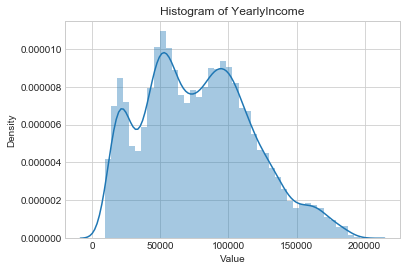

In [17]:
#Display current histogram & distribution of Age
def hist_plot(vals, lab):
    sns.distplot(vals)  #distribution plot of values
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')   #Label of x-axis
    plt.ylabel('Density')  #Label of y-axis
    
hist_plot(AW_Custs_R['YearlyIncome'], 'YearlyIncome')

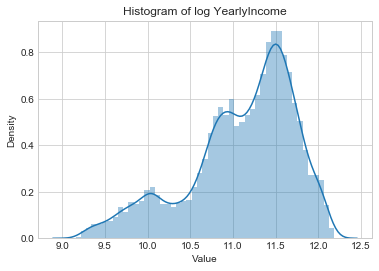

In [18]:
#Above- Distribution is slightly left skewed
  #Log transformation can work for skewed data w/out values =<0
    
AW_Custs_R['log_YearlyIncome'] = np.log(AW_Custs_R['YearlyIncome'])
hist_plot(AW_Custs_R['log_YearlyIncome'], 'log YearlyIncome')

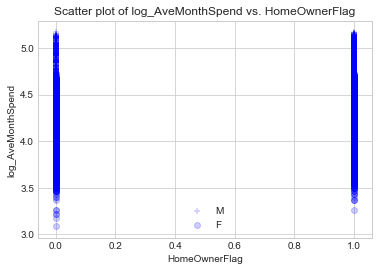

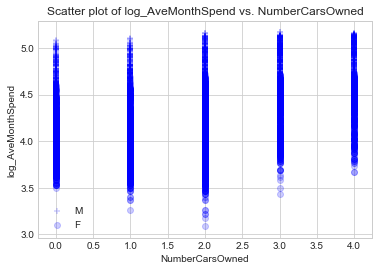

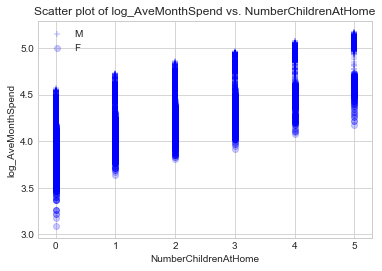

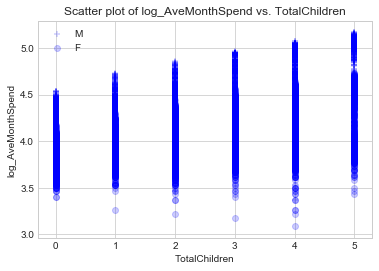

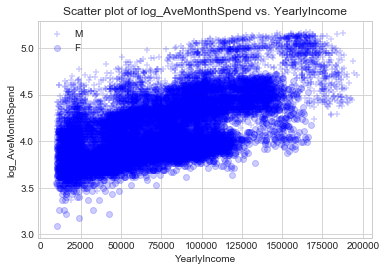

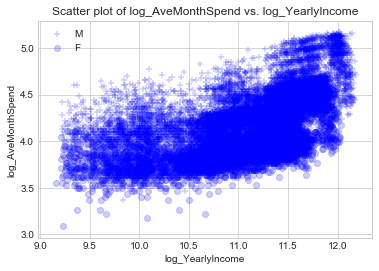

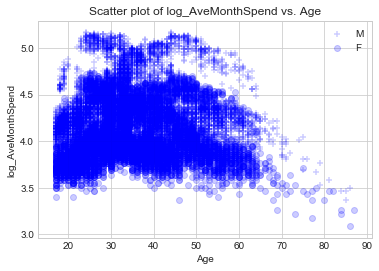

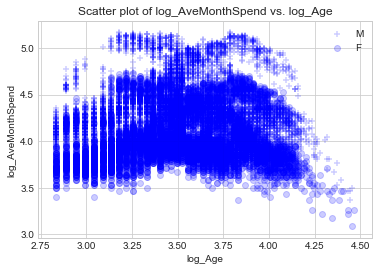

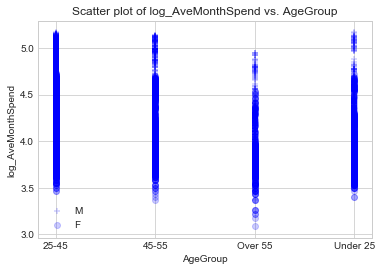

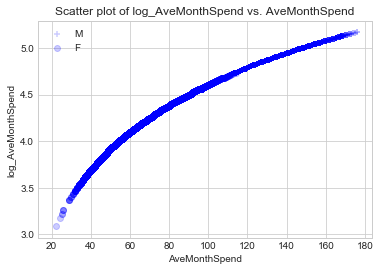

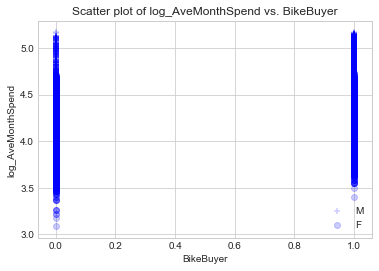

In [19]:
#Above- Distribution does not look more symmetric, but still multi-modal and more skew indicated.
 # This is still an improvement over the raw AveMonthSpend.
    
#Check how new log transform of label changes relationship w/ numeric features
def plot_scatter_shape(AW_Custs_R, cols, shape_col = 'Gender', col_y = 'log_AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = AW_Custs_R[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = AW_Custs_R[AW_Custs_R[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
             'TotalChildren', 'YearlyIncome', 'log_YearlyIncome', 'Age','log_Age', 'AgeGroup', 'AveMonthSpend', 'BikeBuyer']
plot_scatter_shape(AW_Custs_R, num_cols)

In [20]:
#Above-  

        
#Save this data to a csv
AW_Custs_R.to_csv('AW_Custs_R_Preped.csv', index = False, header = True)
